In [1]:
from sklearn.metrics import mean_absolute_error, root_mean_squared_error
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


## Merge prediction data to test data

In [65]:
# Load the data
test_data = pd.read_feather('../data/processed/test_data.feather')

# Load the predictions
predictions_nn = pd.read_csv('../data/processed/predictions_nn.csv')
predictions_xgb = pd.read_csv('../data/processed/predictions_xgb.csv')
predictions_lgbm = pd.read_csv('../data/processed/predictions_lgbm.csv')


In [66]:
test_data = test_data.reset_index(drop=True)
predictions_nn = predictions_nn.reset_index(drop=True)
predictions_xgb = predictions_xgb.reset_index(drop=True)
predictions_lgbm = predictions_lgbm.reset_index(drop=True)


data = pd.concat([test_data, predictions_nn,predictions_xgb,predictions_lgbm], axis=1)


## Metrics

In [72]:
# Get metrics
def metrics_error(y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    rmse = root_mean_squared_error(y_true, y_pred)
    return mae, rmse

# Get metrics from data and return table
def metrics_error_table(data):
    mae_nn, rmse_nn = metrics_error(data['totalFare'], data['nn_predicted_totalFare'])
    mae_xgb, rmse_xgb = metrics_error(data['totalFare'], data['xgb_predicted_totalFare'])
    mae_lgbm, rmse_lgbm = metrics_error(data['totalFare'], data['lgbm_predicted_totalFare'])
    return pd.DataFrame({
        'Model': ['NN', 'XGB', 'LGBM'],
        'MAE': [mae_nn, mae_xgb, mae_lgbm],
        'RMSE': [rmse_nn, rmse_xgb, rmse_lgbm]
    })

# mae, rmse = metrics_error(data['y_true'], data['y_pred'])
# print(f'MAE: {mae:.2f}')
# print(f'RMSE: {rmse:.2f}')

In [73]:
metrics_error_table(data)

Model        MAE        RMSE
0    NN  70.443315  106.791914
1   XGB  66.573627   98.770034
2  LGBM  74.185101  108.315537

## Plots

### SNS Theme

In [107]:
# Create sns colour palette and add to theme
#a8e6cf pastel green	
#dcedc1	pastel lighter green
#ffd3b6	pastel orange
#ffaaa5	pastel pink
#ff8b94 pastel red 

def set_custom_theme():
    sns.set_style('whitegrid')  # Set the style to whitegrid
    sns.set_palette(sns.color_palette(['#a8e6cf', '#dcedc1', '#ffd3b6', '#ffaaa5', '#ff8b94']))  # Set the custom palette
    # Manually set font sizes
    plt.rc('axes', titlesize=14)     # Font size for axes titles
    plt.rc('axes', labelsize=12)     # Font size for x and y labels
    plt.rc('xtick', labelsize=10)    # Font size for x tick labels
    plt.rc('ytick', labelsize=10)    # Font size for y tick labels
    plt.rc('legend', fontsize=12)    # Font size for legend
    plt.rc('font', size=12)          # General font size
    

# Apply the custom theme
set_custom_theme()


### Scatter Plot True vs Predict

In [ ]:
# Plot true vs predicted scatter using sns
def plot_true_vs_pred(y_true, y_pred, title='Actual vs Predicted',y_pred2=None):
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=y_true, y=y_pred, alpha=0.7)
    if y_pred2 is not None:
        # Add second scatter plot colour coded using last colour in palette
        sns.scatterplot(x=y_true, y=y_pred2, alpha=0.7, color=sns.color_palette()[-1])
        plt.legend([ 'NN','XGB'])
    plt.plot([0, max(y_true)], [0, max(y_true)], color='#d3d3d3', linewidth=1, linestyle='--')  # Light grey dashed line
    plt.title(title, pad=30)  # Add padding to the title
    plt.ylim(0, 5000 )
    plt.xlim(0, 5000 )
    plt.xlabel('Actual', labelpad=15)  # Add padding to the x-axis label
    plt.ylabel('Predicted', labelpad=15)  # Add padding to the y-axis label
    
    plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.1)  # Add white space border

    



/tmp/ipykernel_299351/524554404.py:10: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig('../reports/figures/actual_vs_predicted_nn_xgb_overlay.png')


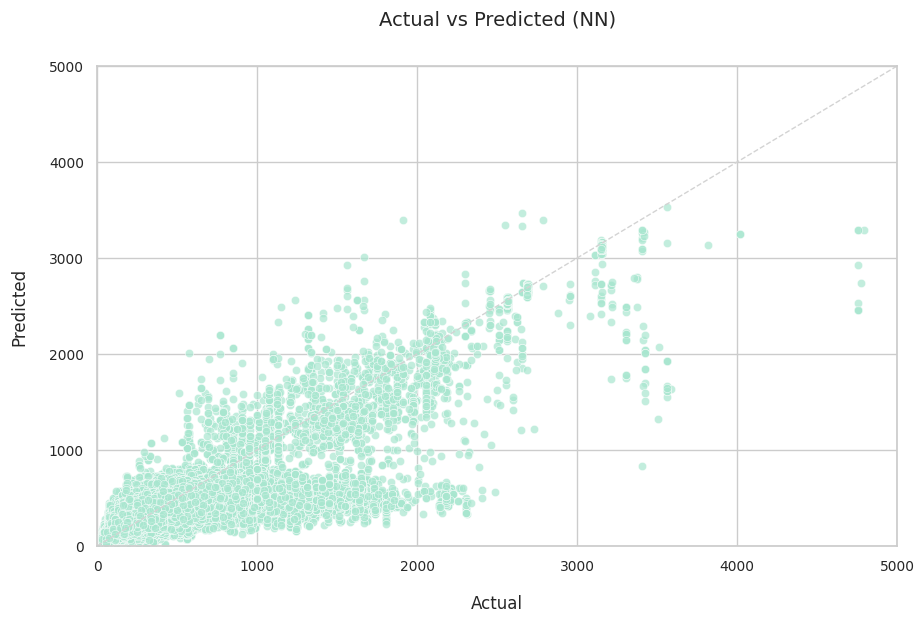

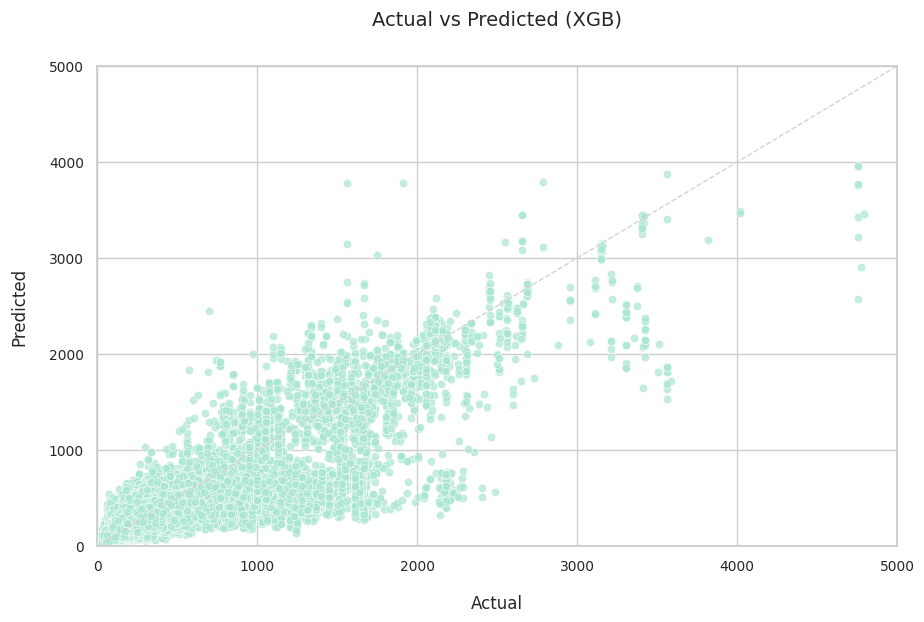

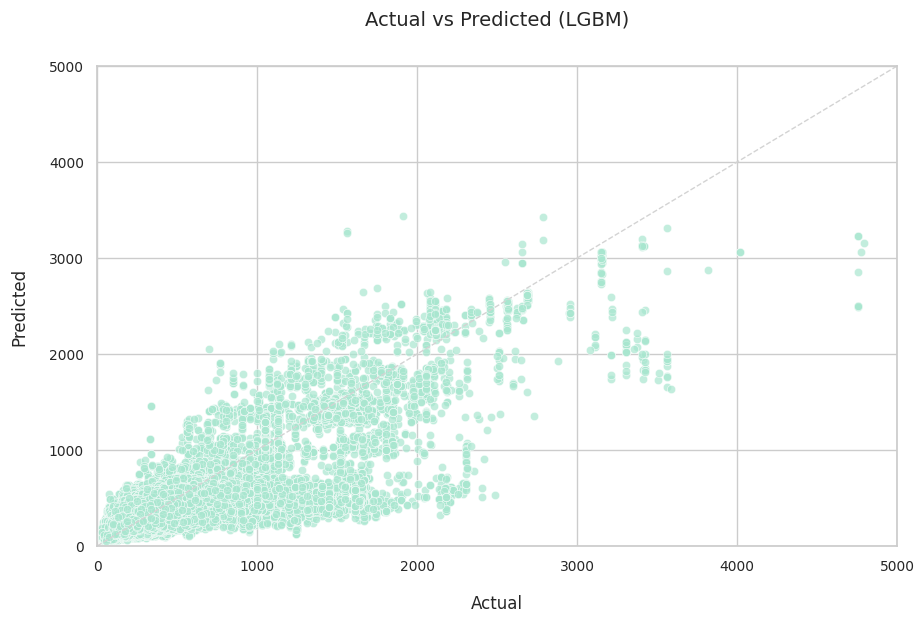

/home/raytechie/Projects/adv_mla_at3/ml_experimentation/.venv/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


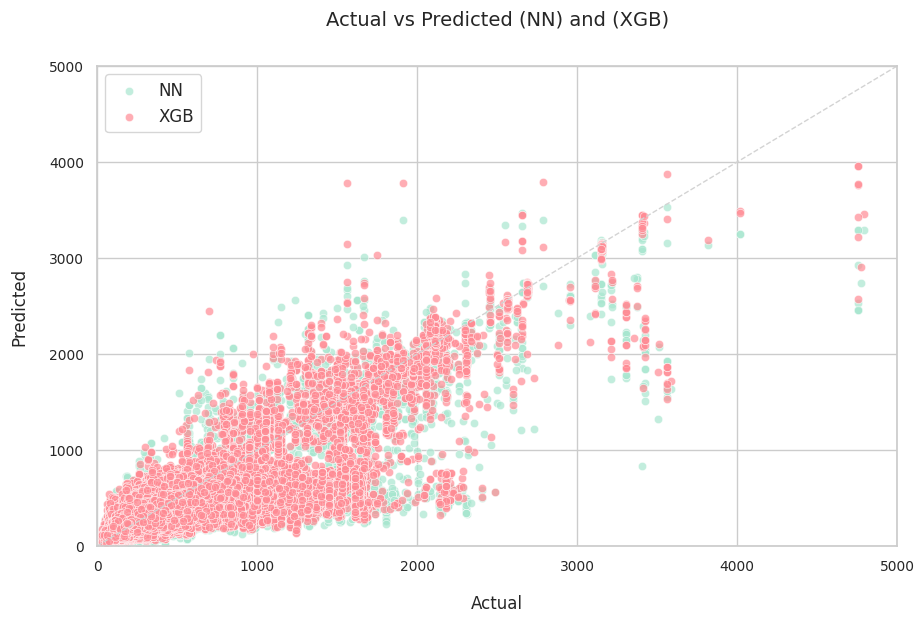

In [ ]:
# Example     

plot_true_vs_pred(data['totalFare'], data['nn_predicted_totalFare'], title='Actual vs Predicted (NN)')
plt.savefig('../reports/figures/actual_vs_predicted_nn.png')
plot_true_vs_pred(data['totalFare'], data['xgb_predicted_totalFare'], title='Actual vs Predicted (XGB)')
plt.savefig('../reports/figures/actual_vs_predicted_xgb.png')
plot_true_vs_pred(data['totalFare'], data['lgbm_predicted_totalFare'], title='Actual vs Predicted (LGBM)')
plt.savefig('../reports/figures/actual_vs_predicted_lgbm.png')
plot_true_vs_pred(data['totalFare'], data['nn_predicted_totalFare'], title='Actual vs Predicted (NN) and (XGB)',y_pred2=data['xgb_predicted_totalFare'])
plt.savefig('../reports/figures/actual_vs_predicted_nn_xgb_overlay.png')



### Time series plot

### Airport Route Facet Plots

In [ ]:
# Plot Airport Route Facet Plot
def route_facet_plot(data, col_facet, x,model_col, title, label=None):
    g = sns.FacetGrid(data, col=col_facet, col_wrap=3, height=4, aspect=1)
    print(np.arange(min(data[x]), max(data[x]),1))
    if label is not None:
        g.map_dataframe(sns.barplot, x=x, y='totalFare', label='Actual',alpha=0.7, order=np.arange(min(data[x]), max(data[x])+1,1))
    else:
        g.map_dataframe(sns.barplot, x=x, y='totalFare', label='Actual',alpha=0.7)
    
    g.map_dataframe(
        sns.barplot,
        x=x,
        y=model_col,
        label="Predicted",
        color=sns.color_palette()[-3],
        alpha=0.5,
        errorbar=None,
        
        linewidth=2.5, 
        linestyle= ":",
        edgecolor="orange",
       
        
    )
    g.set_titles(col_template='{col_name}')

    g.set_axis_labels(x, 'Avg Fare') # Set the axis labels
    g.add_legend()  # Add the legend

    # set tickmarks under every graph 1 = ULC, 2=Budget, 3=Regional, 4=Full Service
    if label is not None:
        g.set_xticklabels(label)
    g.tick_params(axis='x', labelbottom=True, )
    # set title
    g.fig.suptitle(title, y=1.05, fontsize=16)

#### Airline

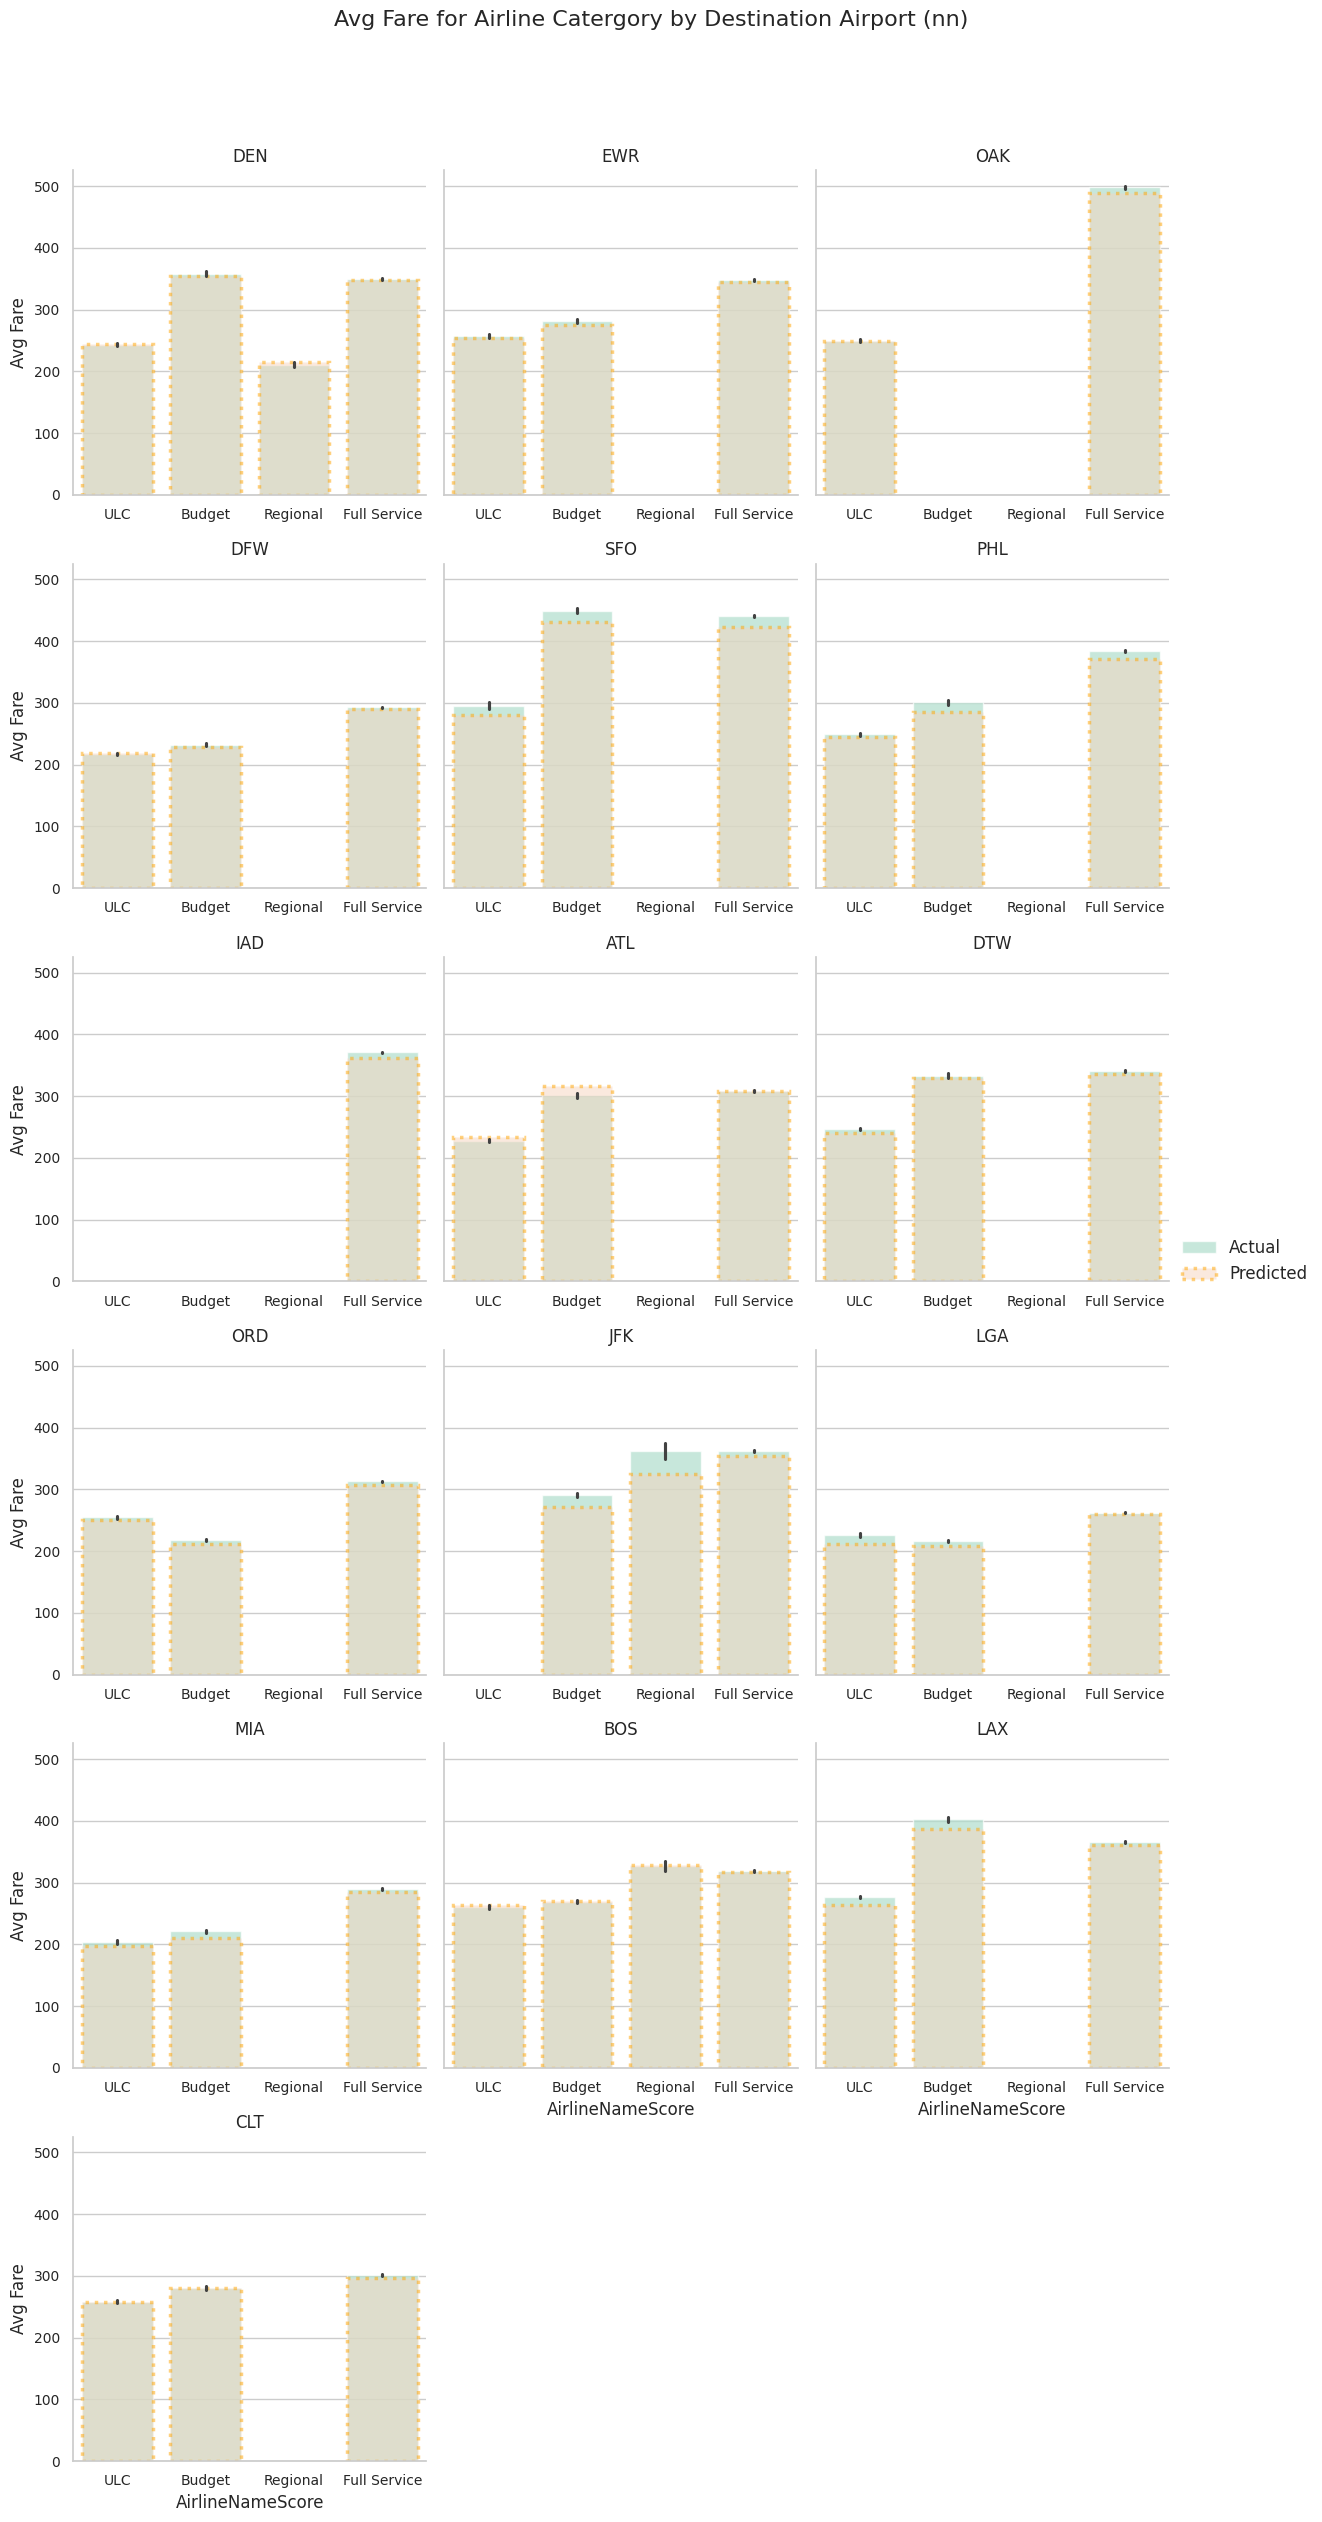

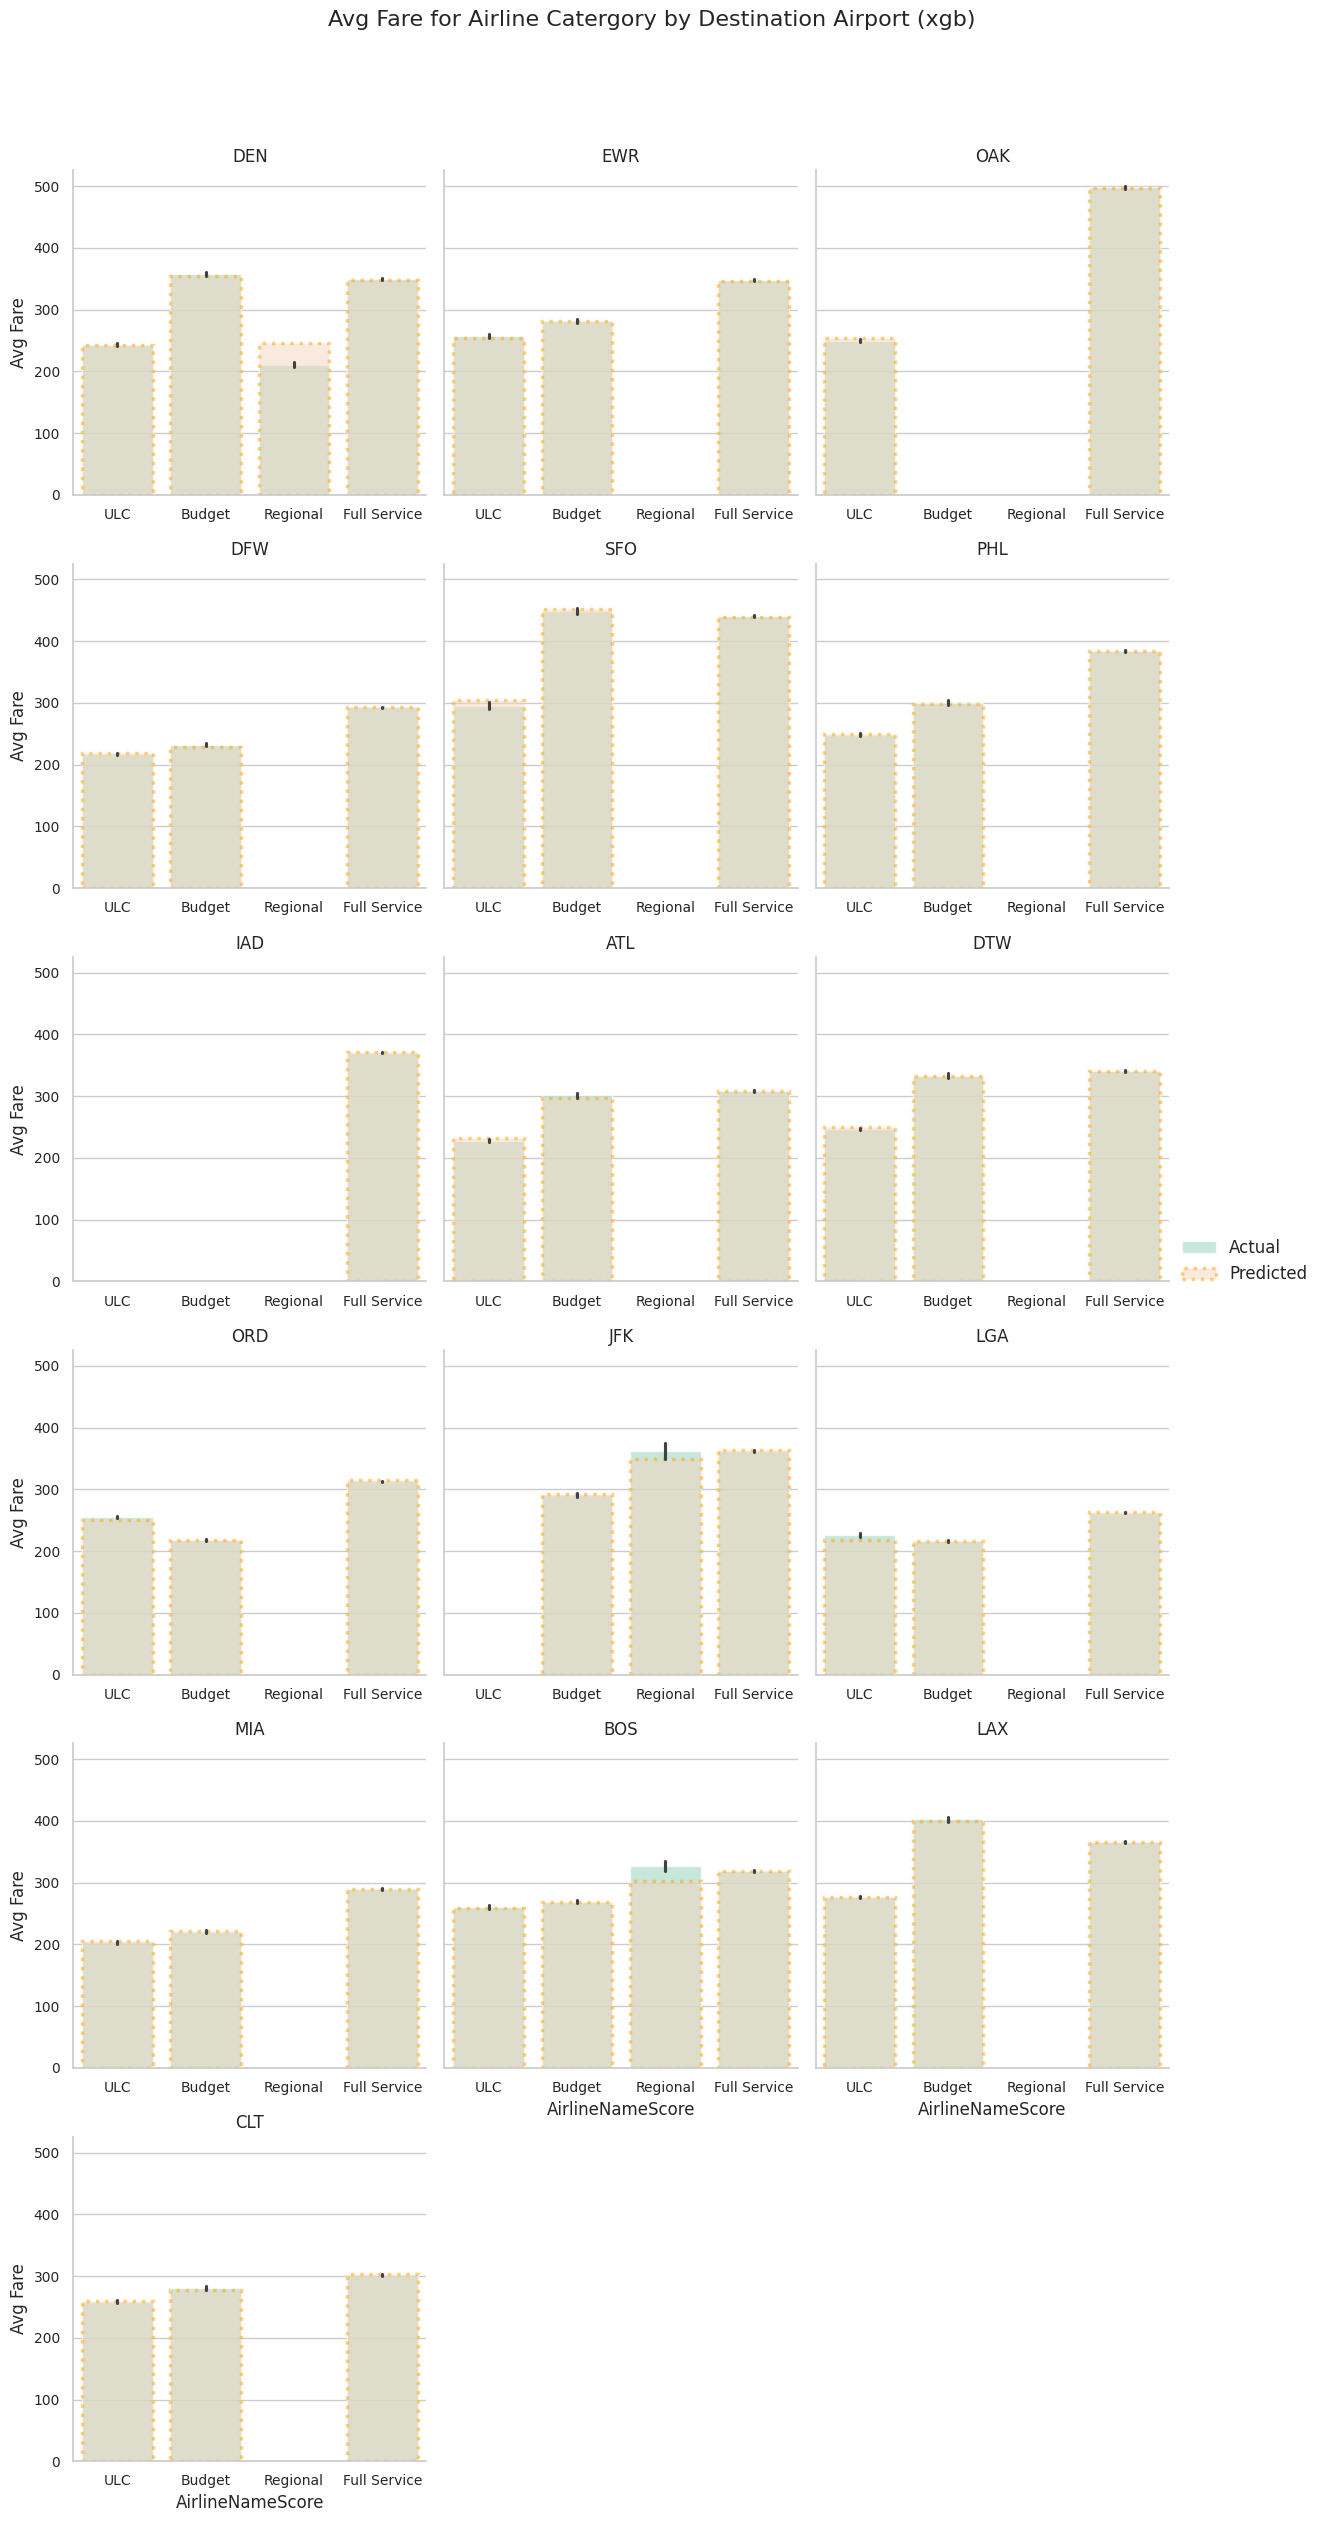

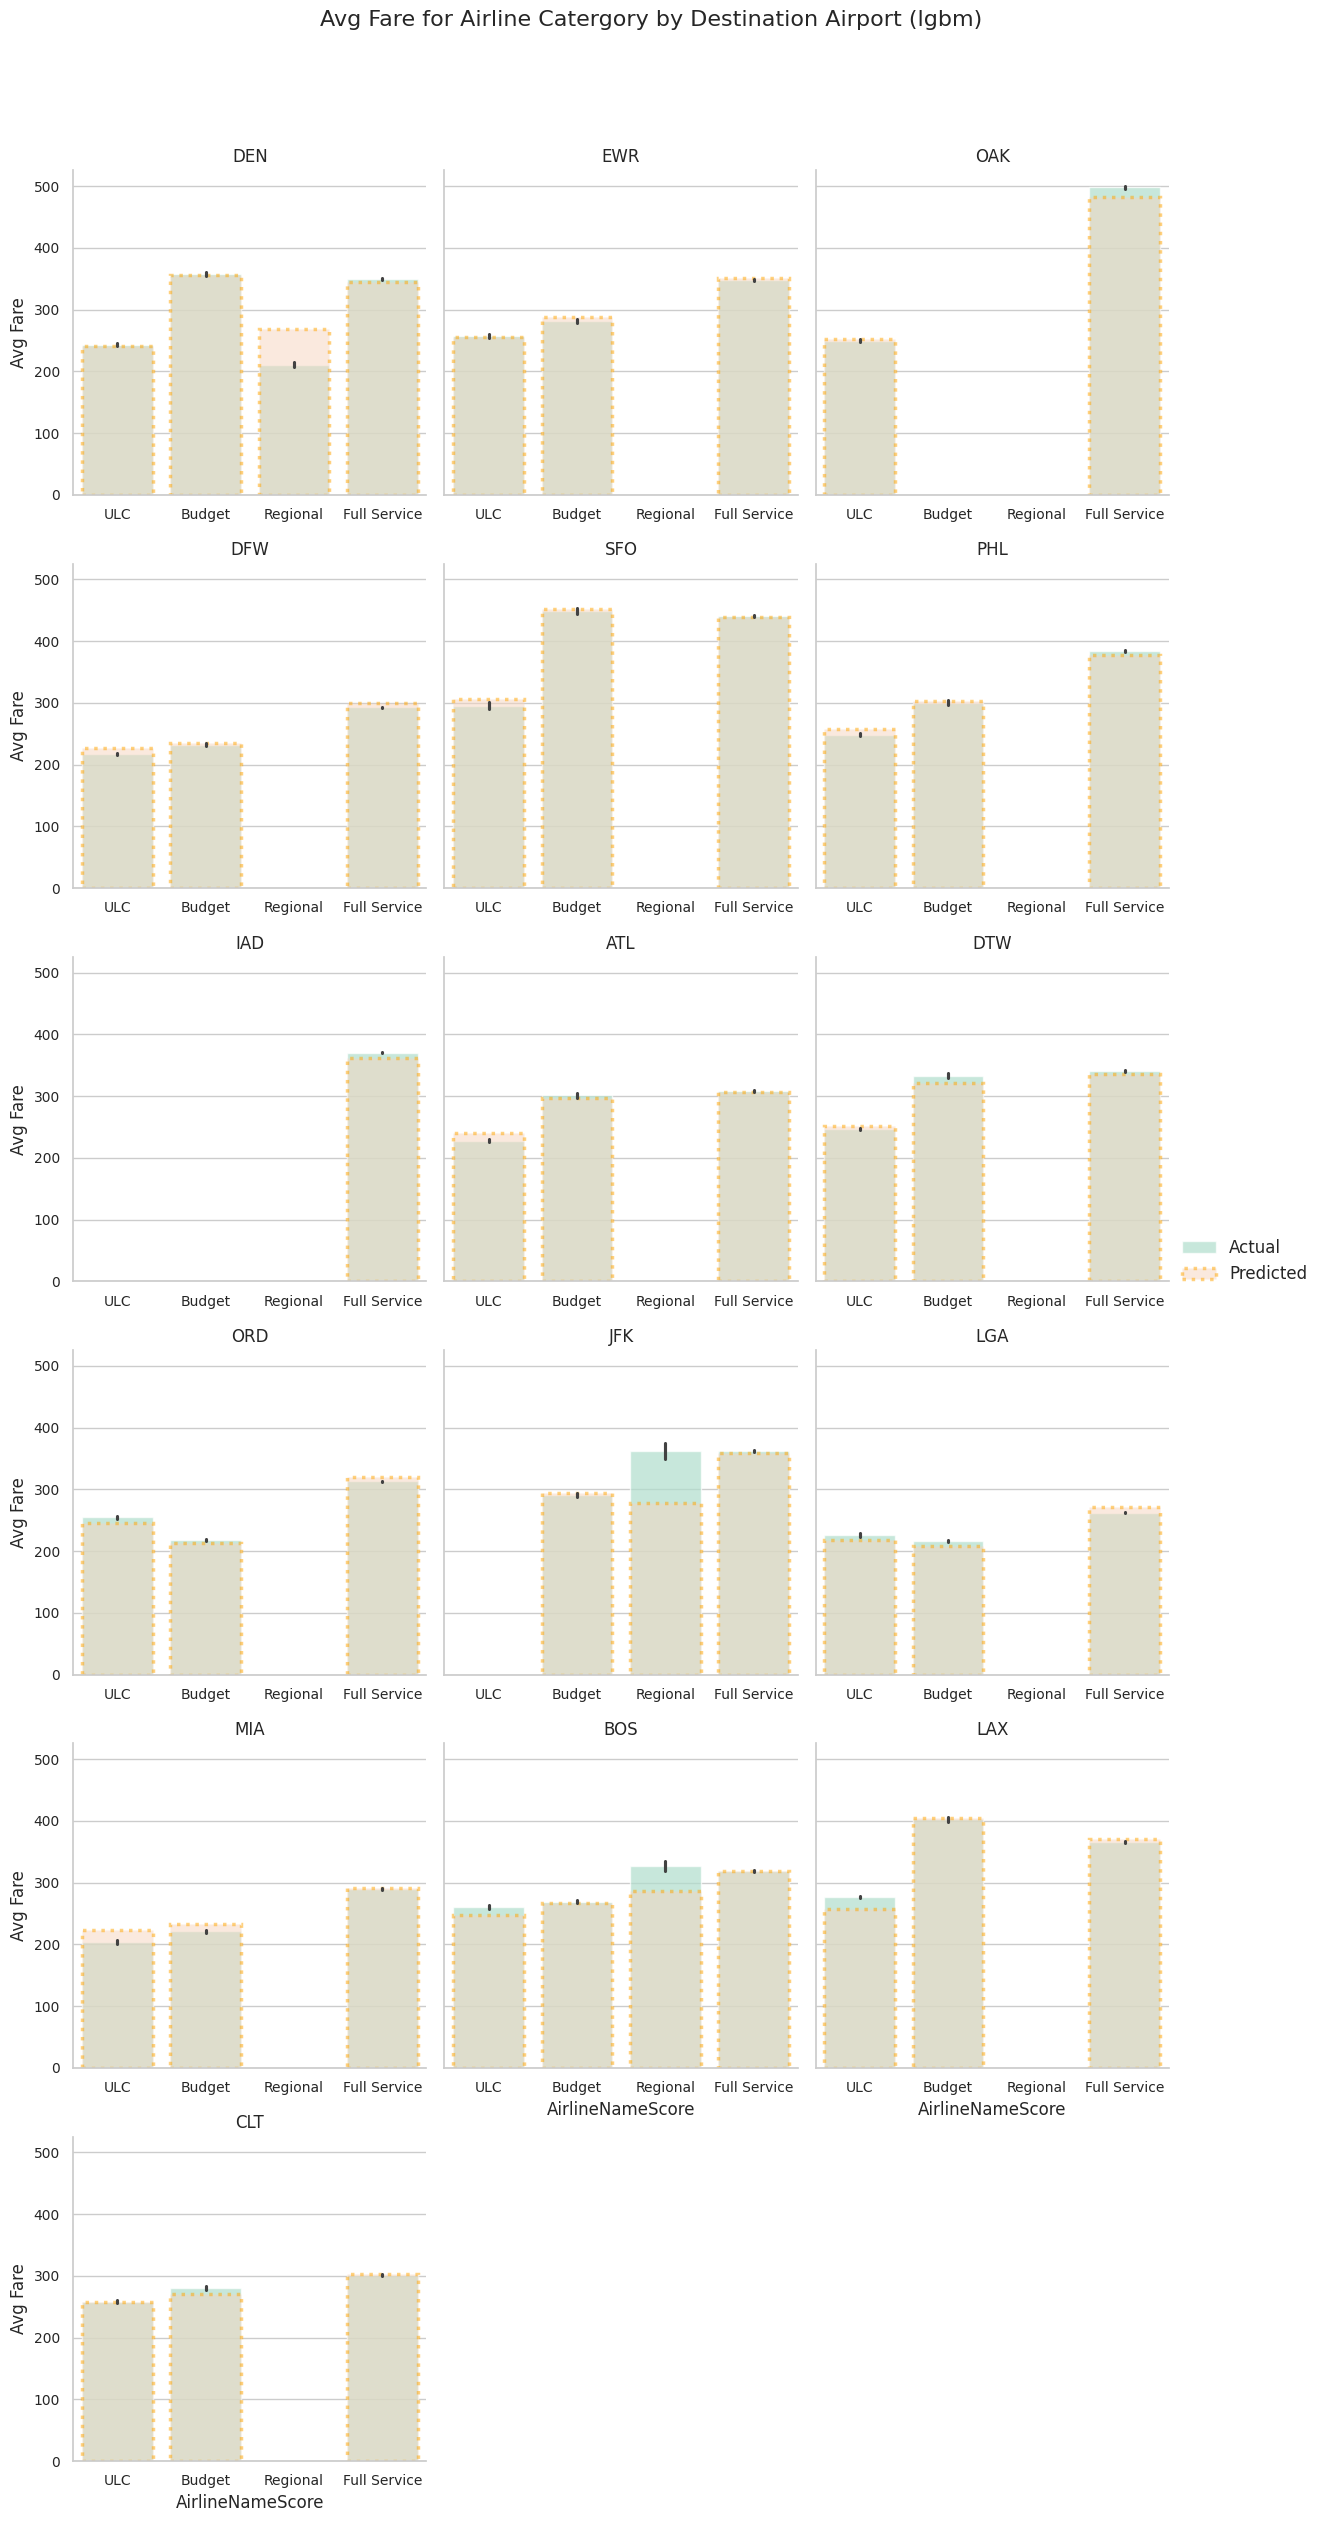

In [180]:
# Example Avg Fare for Airline Catergory by Destination Airport
df = data

route_facet_plot(df, 'destinationAirport', 'AirlineNameScore','nn_predicted_totalFare', 'Avg Fare for Airline Catergory by Destination Airport (nn)')
plt.savefig('../reports/figures/avg_fare_airline_category_by_destination_airport_nn.png')
route_facet_plot(df, 'destinationAirport', 'AirlineNameScore','xgb_predicted_totalFare', 'Avg Fare for Airline Catergory by Destination Airport (xgb)')
plt.savefig('../reports/figures/avg_fare_airline_category_by_destination_airport_xgb.png')
route_facet_plot(df, 'destinationAirport', 'AirlineNameScore','lgbm_predicted_totalFare', 'Avg Fare for Airline Catergory by Destination Airport (lgbm)')
plt.savefig('../reports/figures/avg_fare_airline_category_by_destination_airport_lgbm.png')

[0 1 2 3 4 5]
[0 1 2 3 4 5]
[0 1 2 3 4 5]


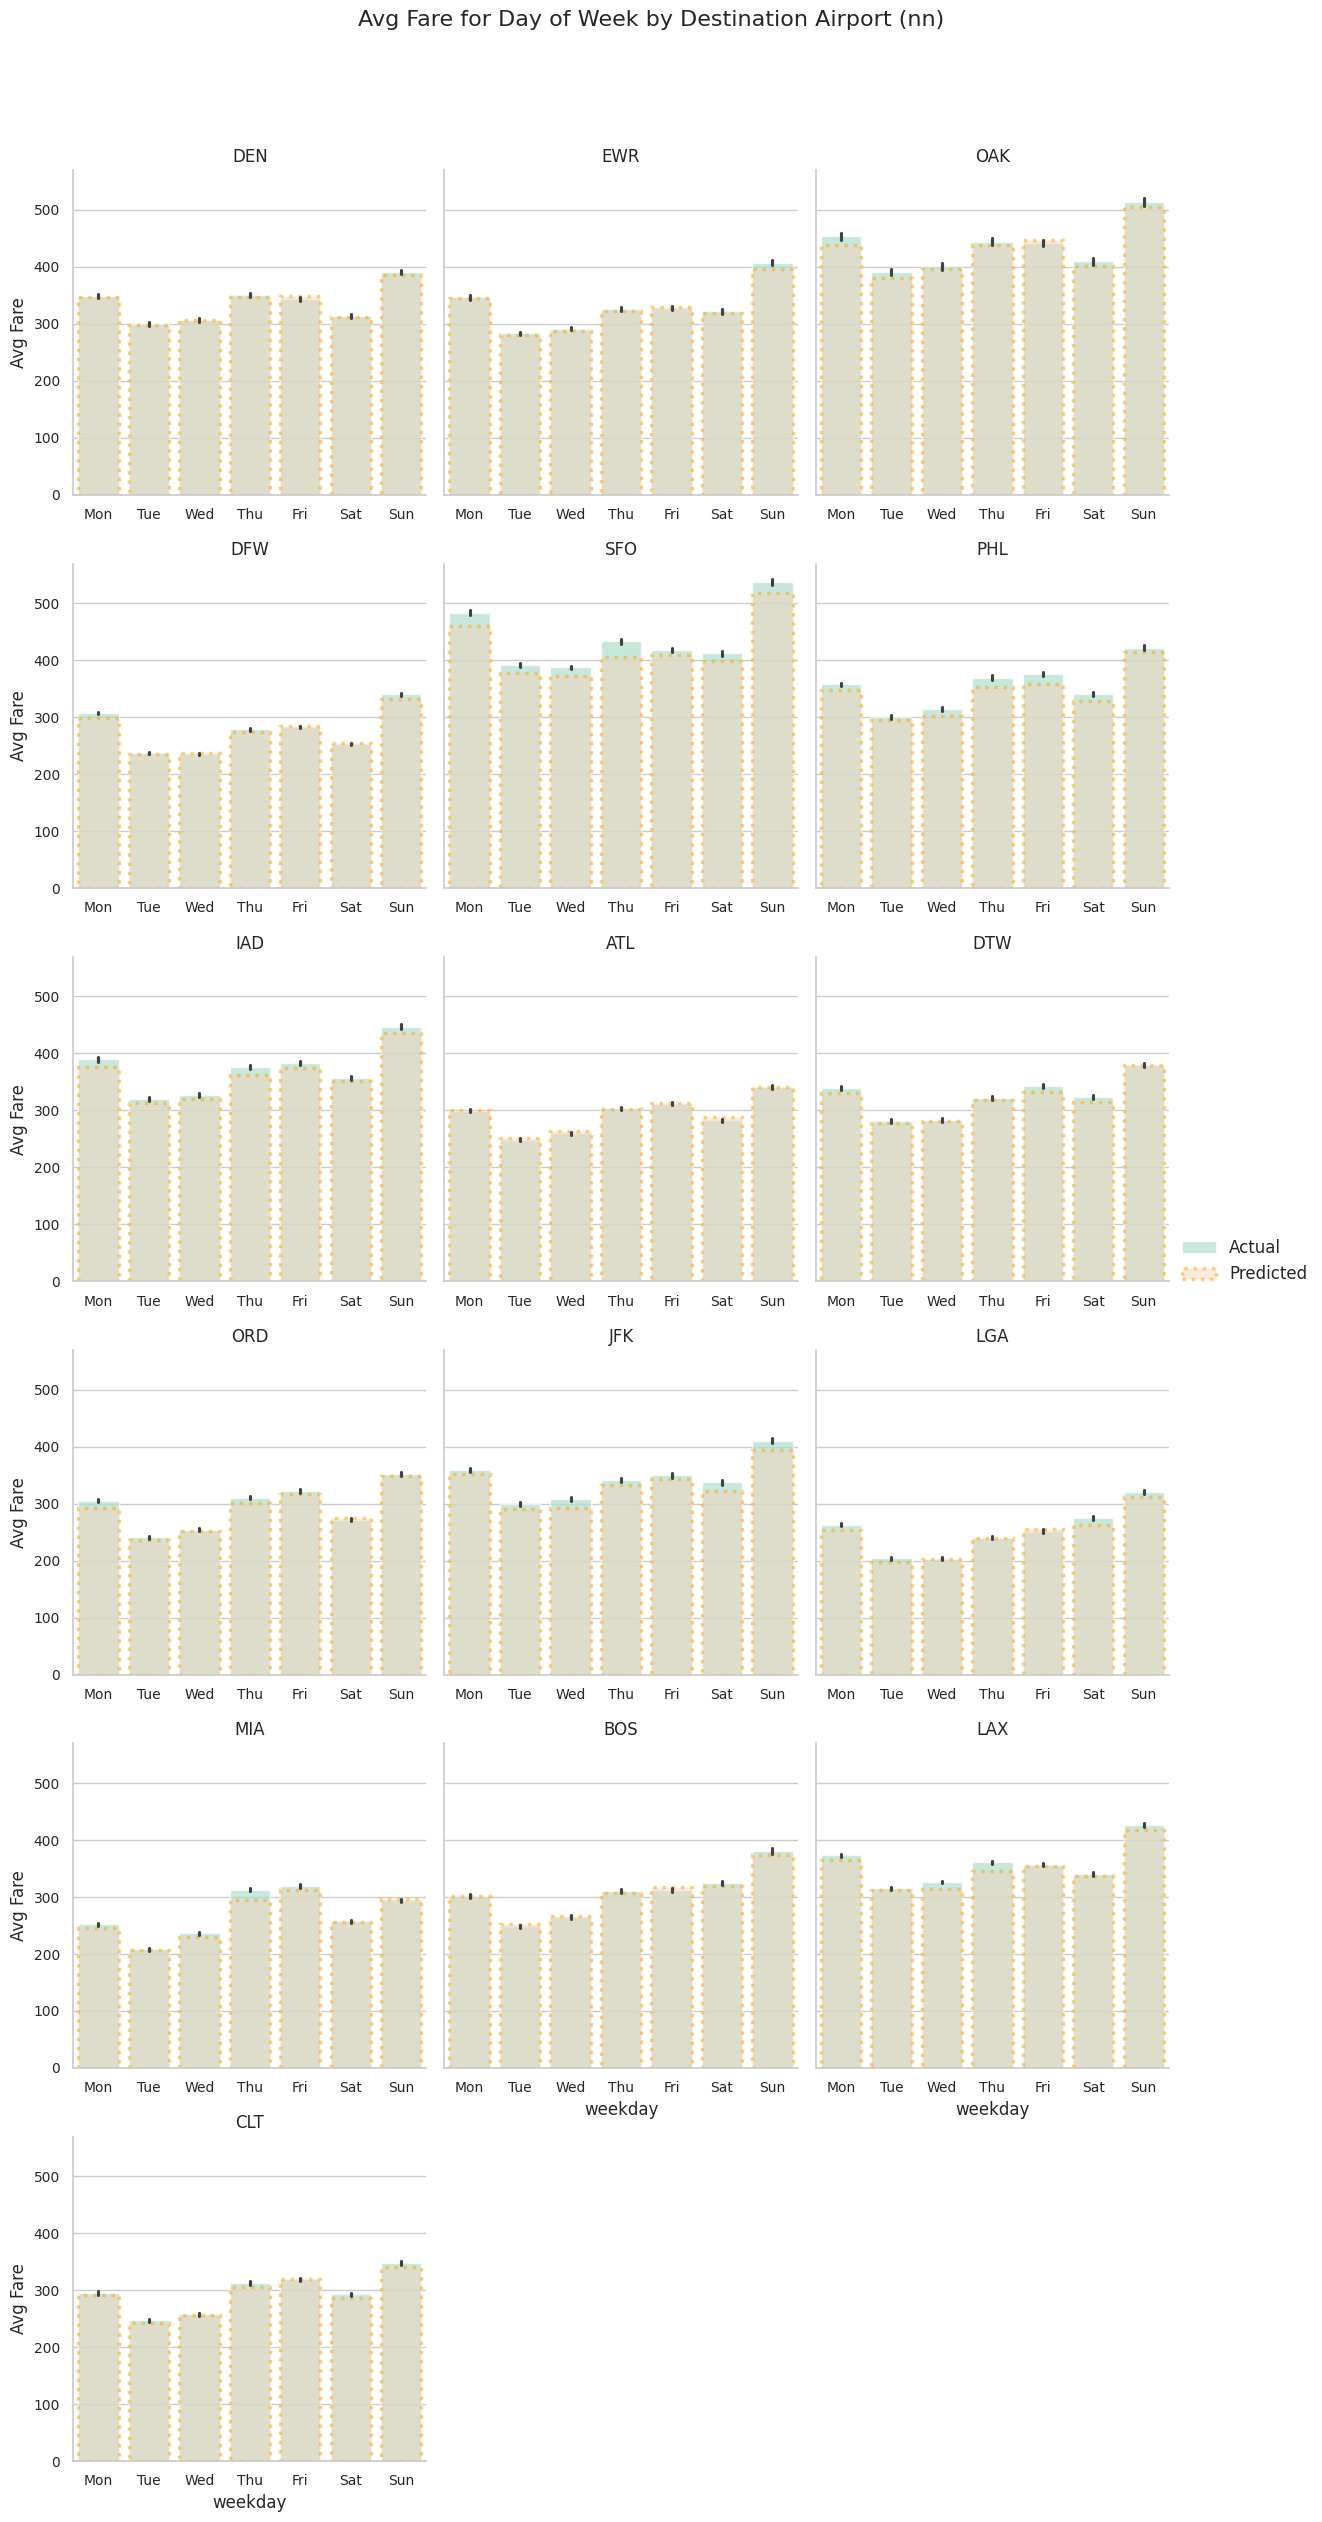

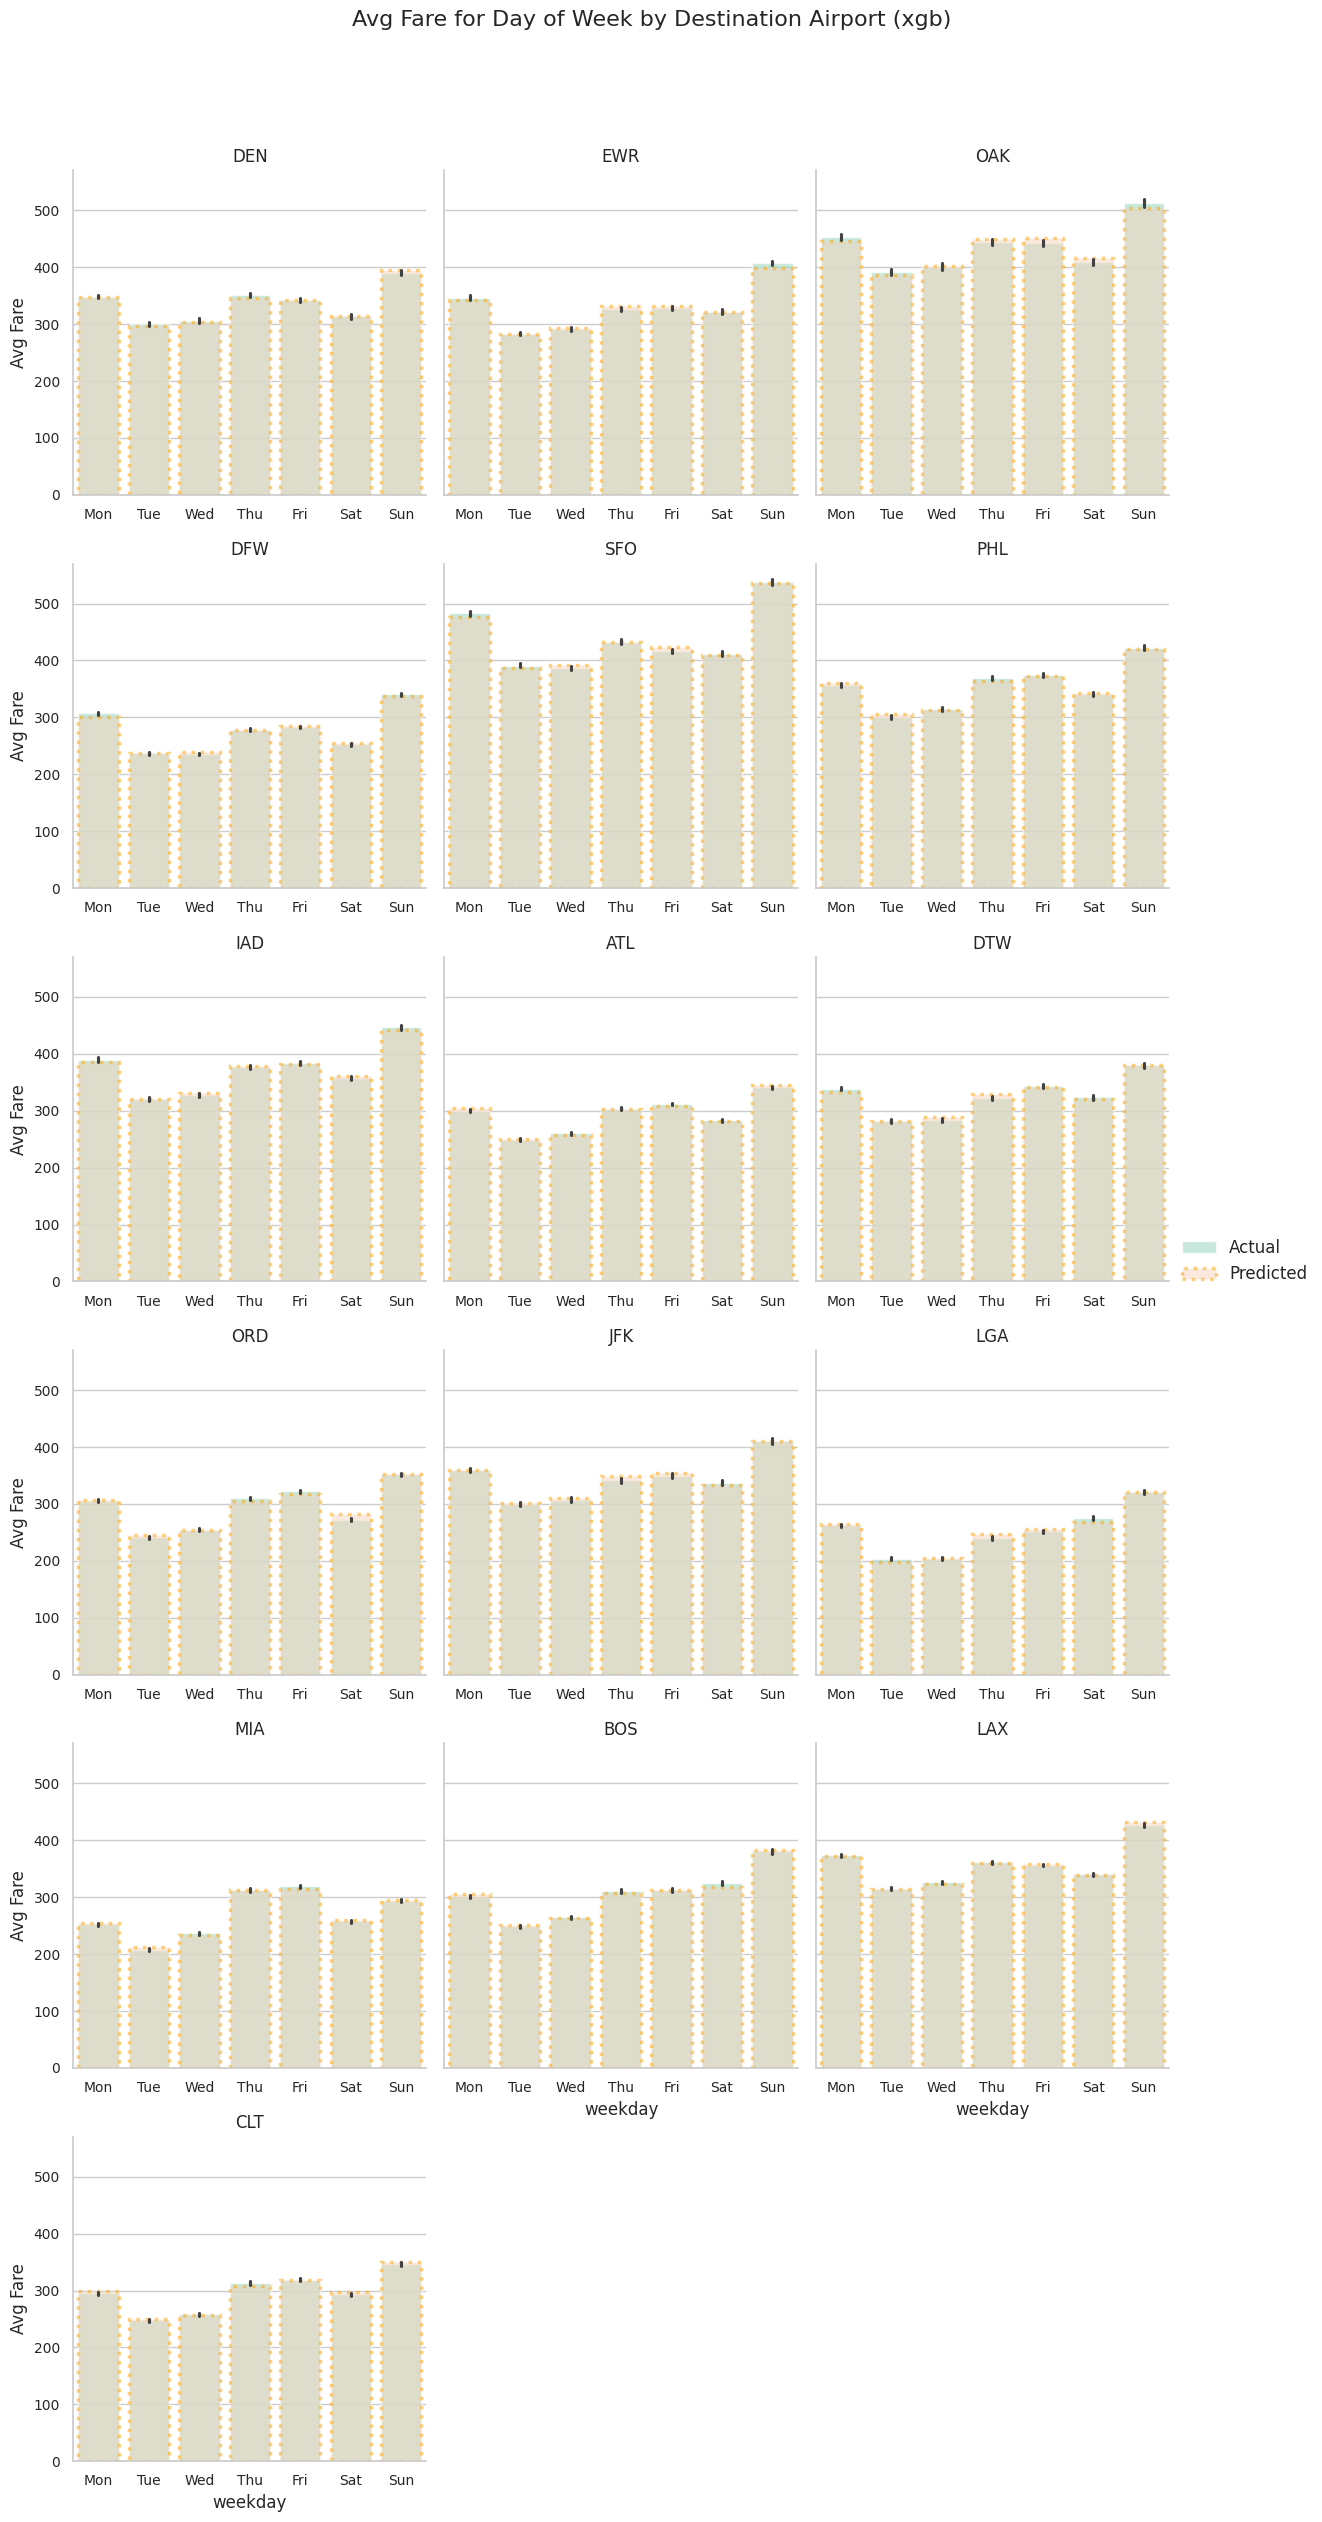

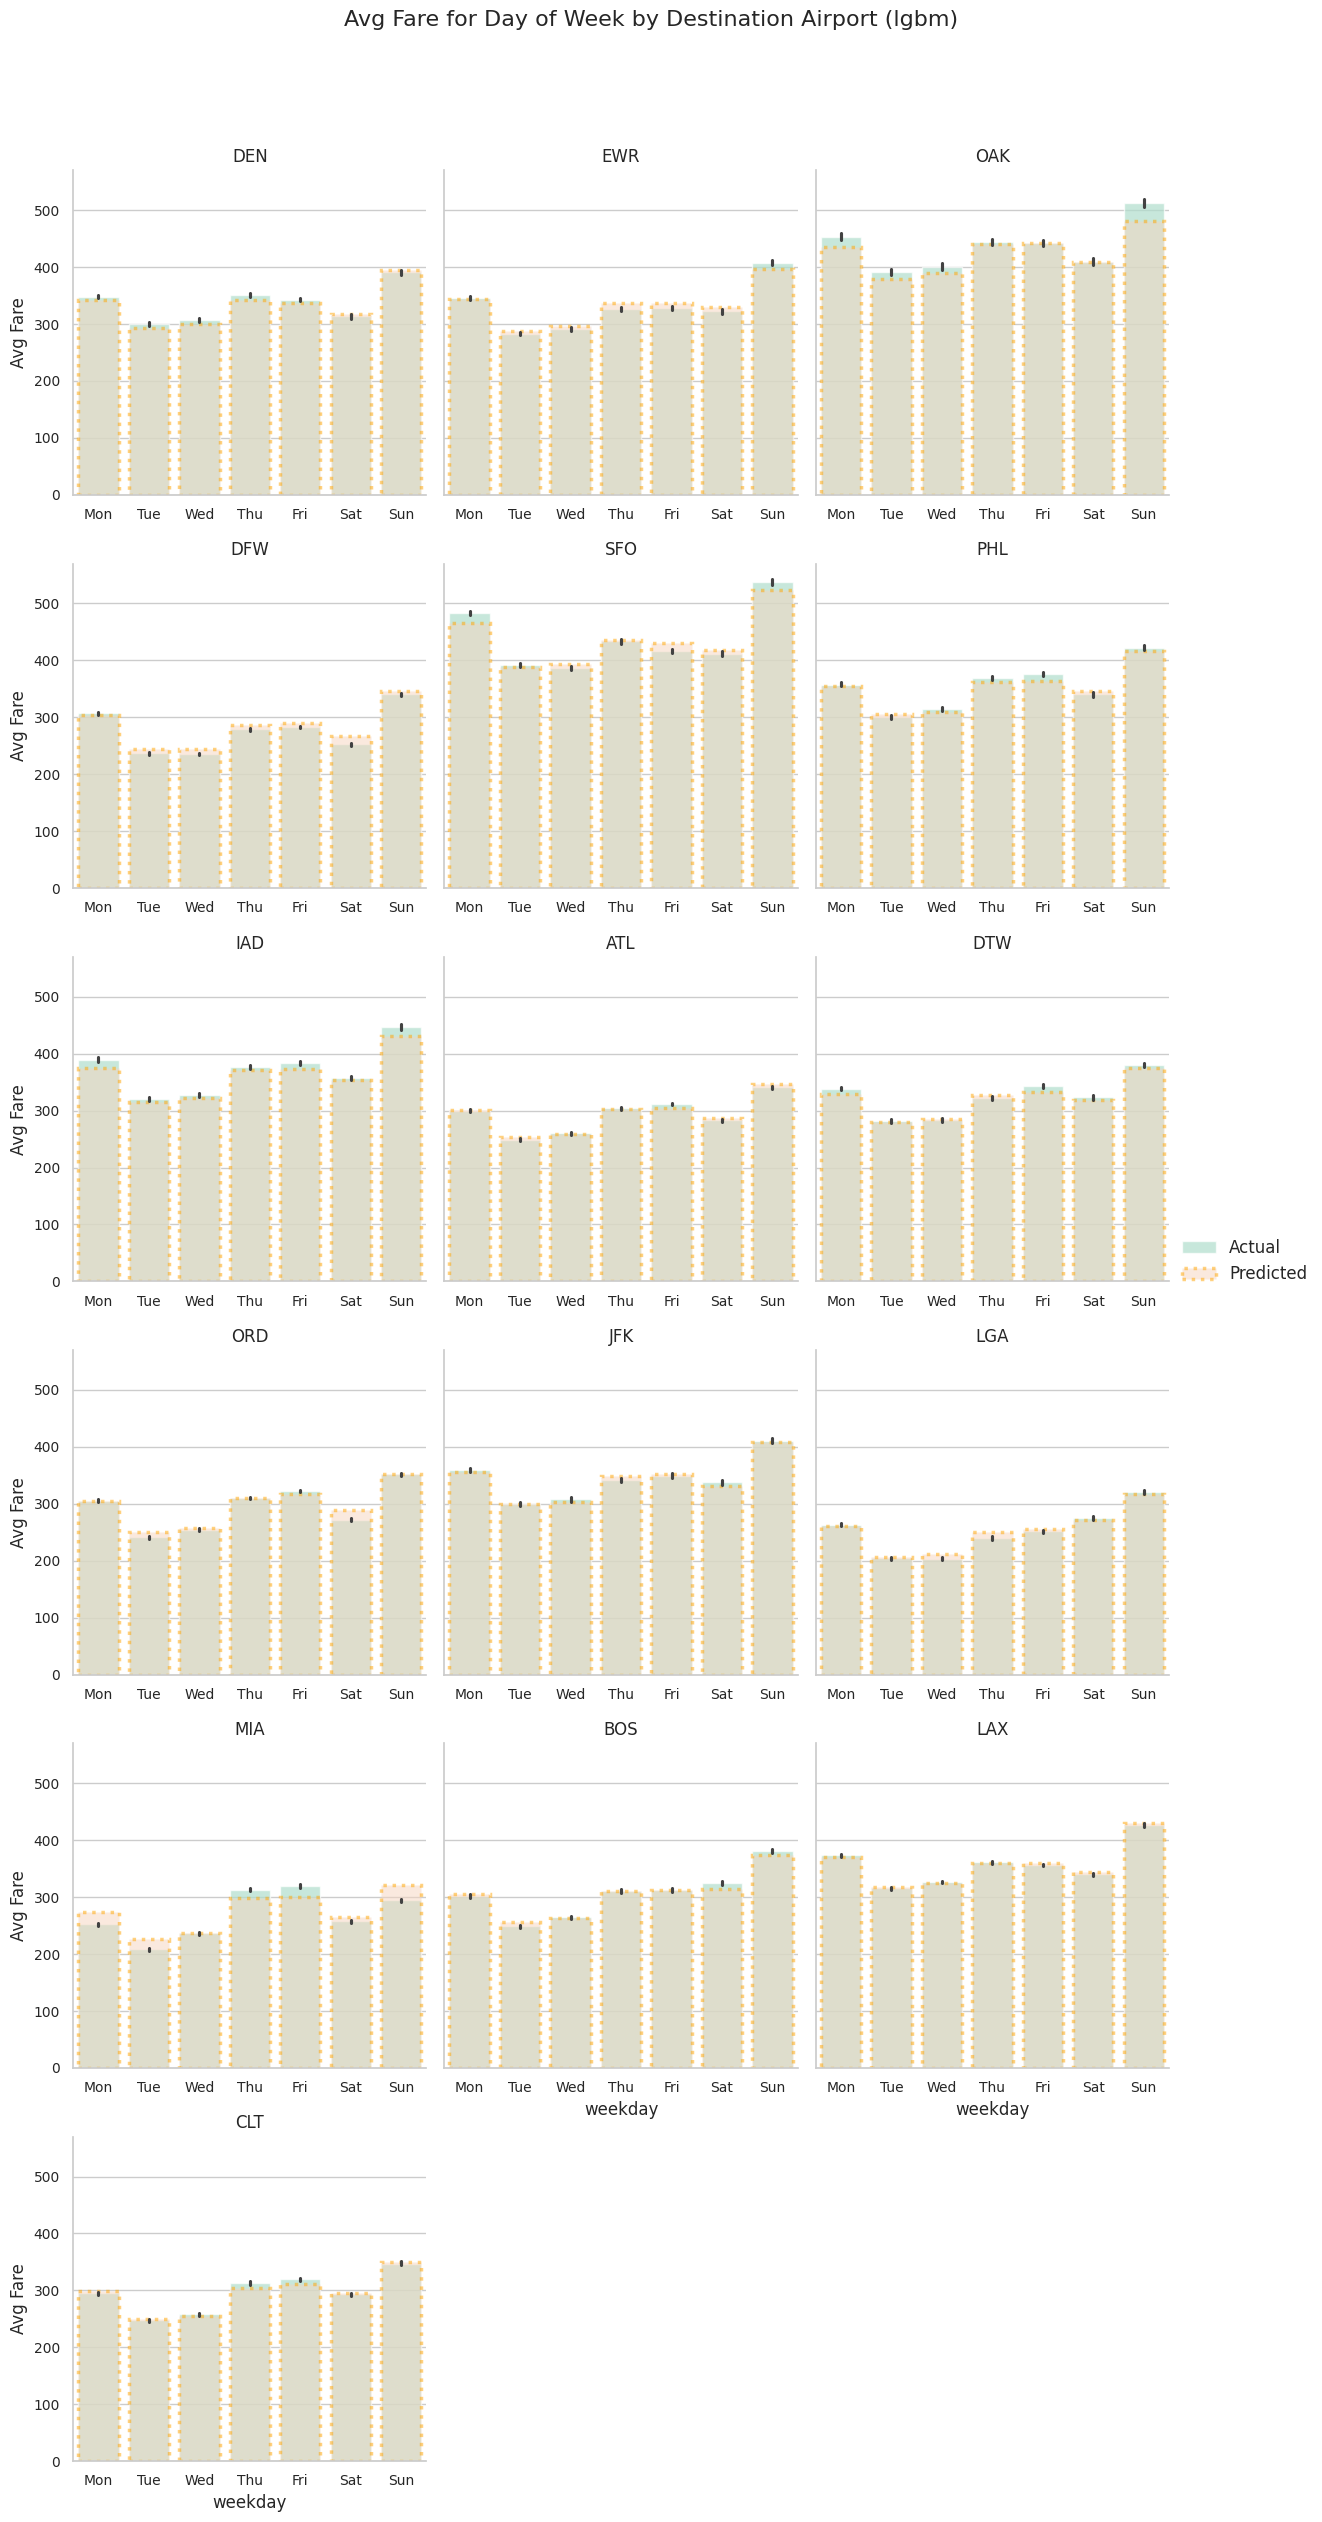

In [204]:
# Avg Fare for Day of Week by Destination Airport
df = data
label=['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
route_facet_plot(df, 'destinationAirport', 'weekday','nn_predicted_totalFare', 'Avg Fare for Day of Week by Destination Airport (nn)', label=label)
plt.savefig('../reports/figures/avg_fare_day_of_week_by_destination_airport_nn.png')
route_facet_plot(df, 'destinationAirport', 'weekday','xgb_predicted_totalFare', 'Avg Fare for Day of Week by Destination Airport (xgb)', label=label)
plt.savefig('../reports/figures/avg_fare_day_of_week_by_destination_airport_xgb.png')
route_facet_plot(df, 'destinationAirport', 'weekday','lgbm_predicted_totalFare', 'Avg Fare for Day of Week by Destination Airport (lgbm)', label=label)
plt.savefig('../reports/figures/avg_fare_day_of_week_by_destination_airport_lgbm.png')


#### Cabin Class

[1. 2. 3.]
[1. 2. 3.]
[1. 2. 3.]


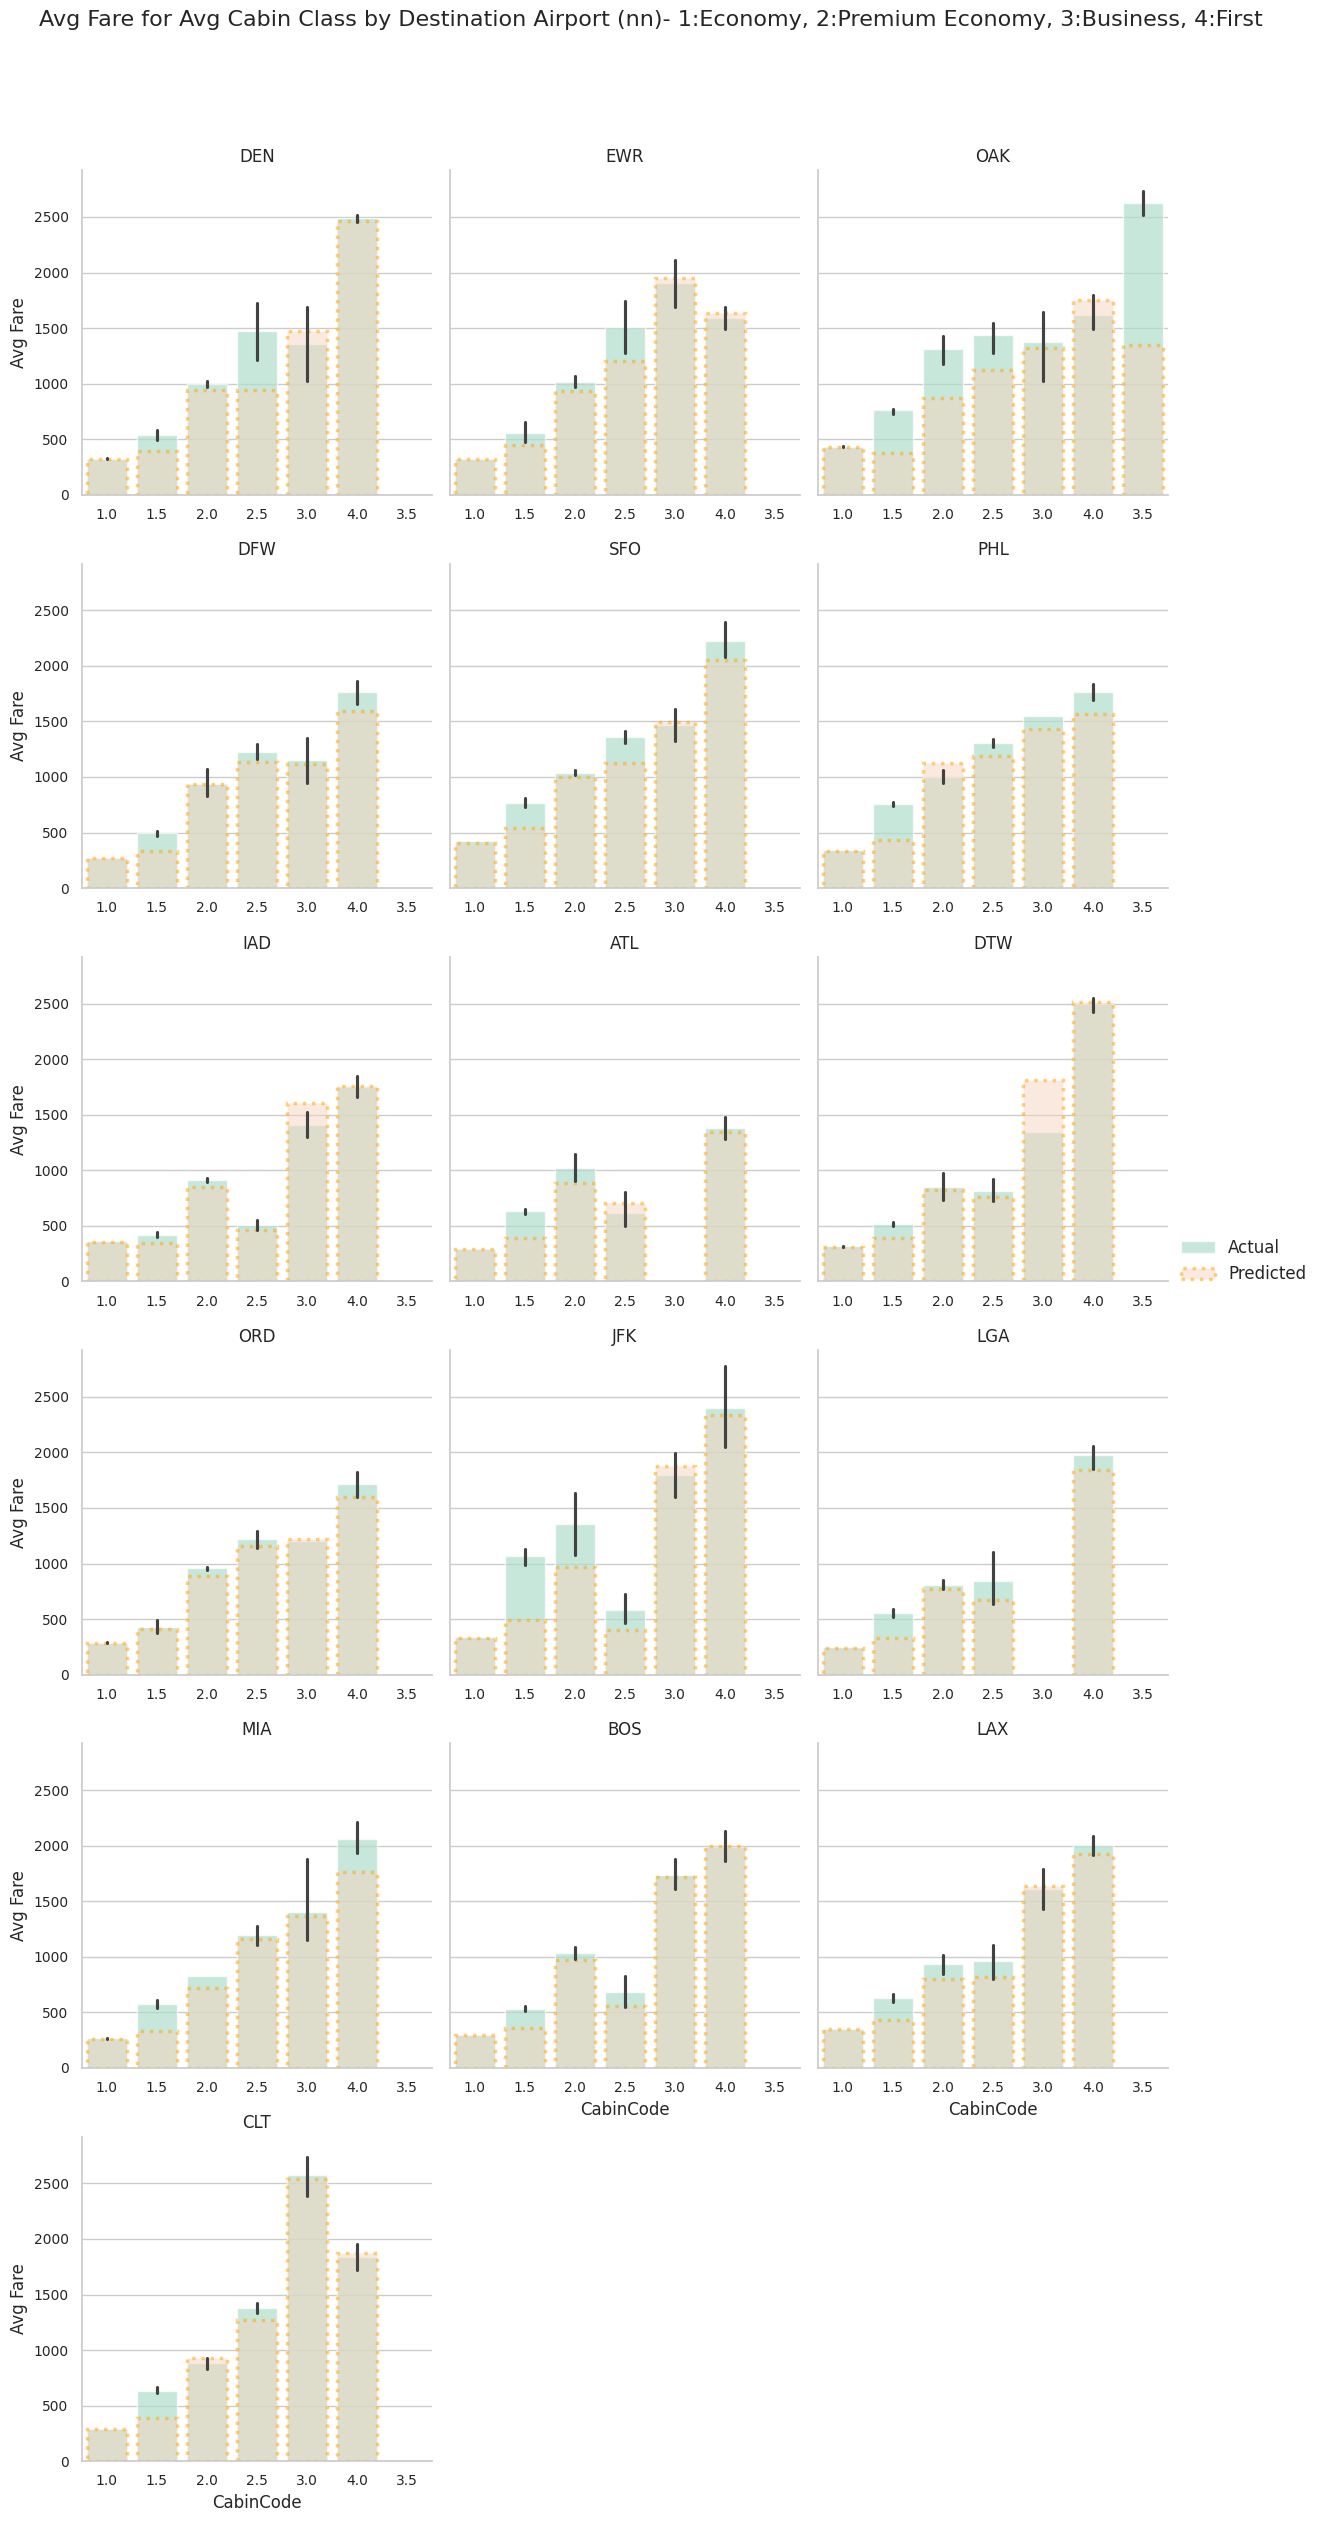

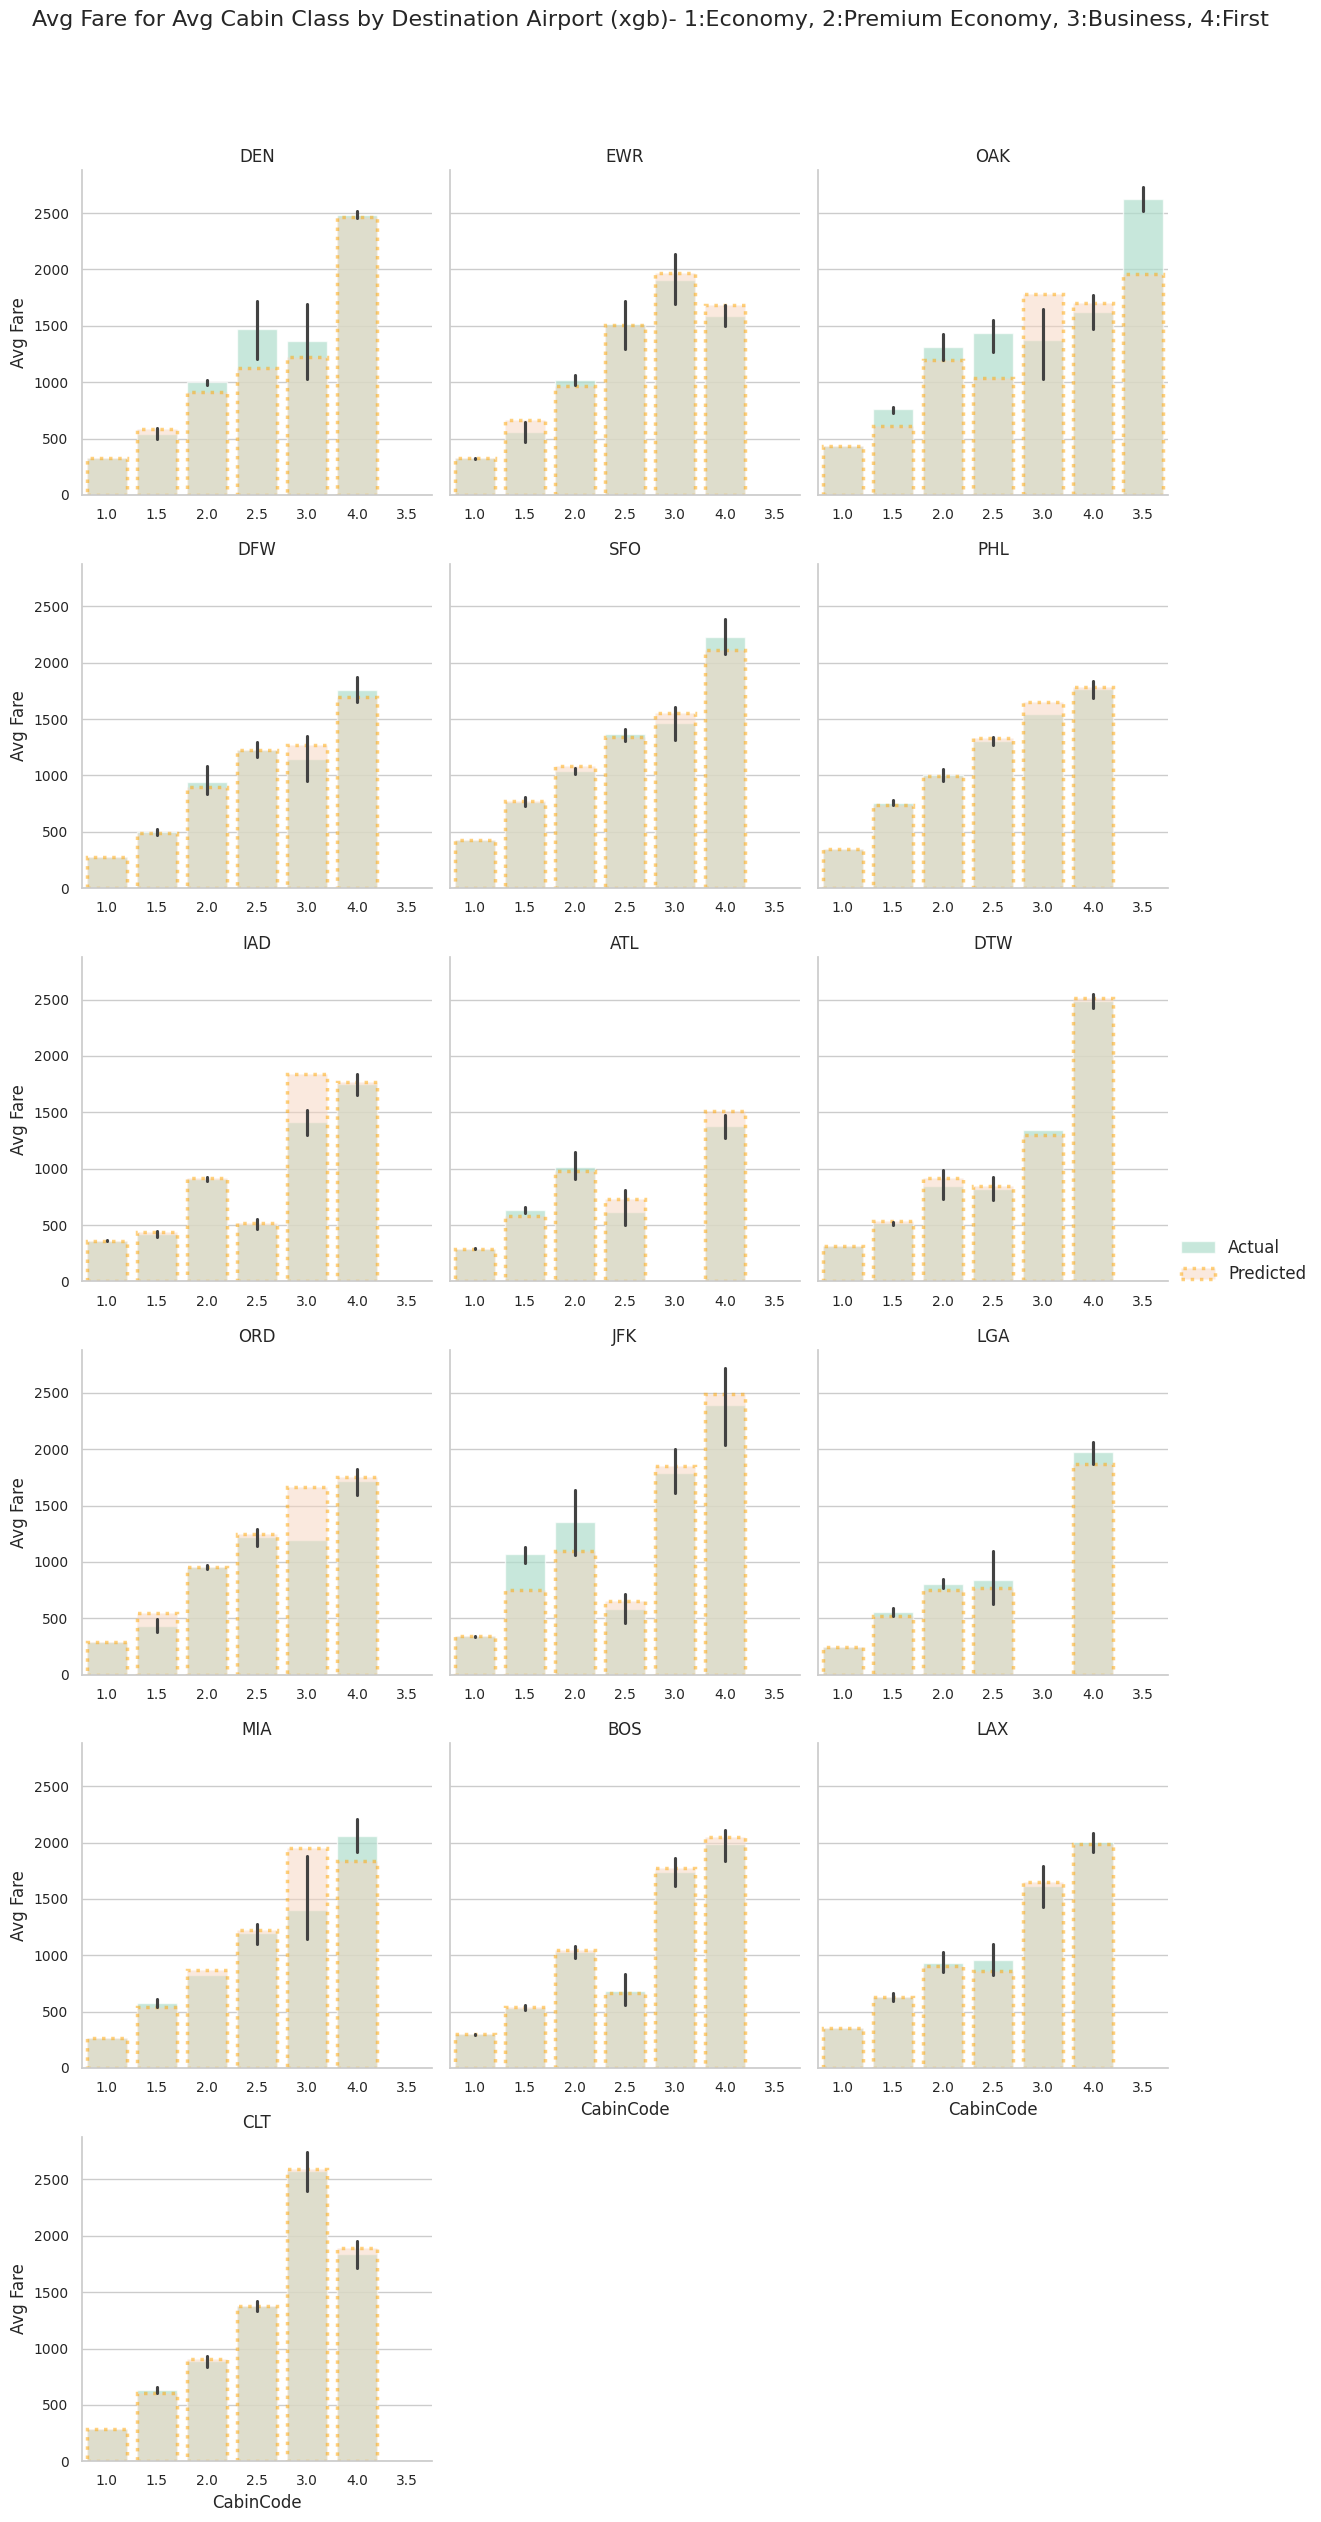

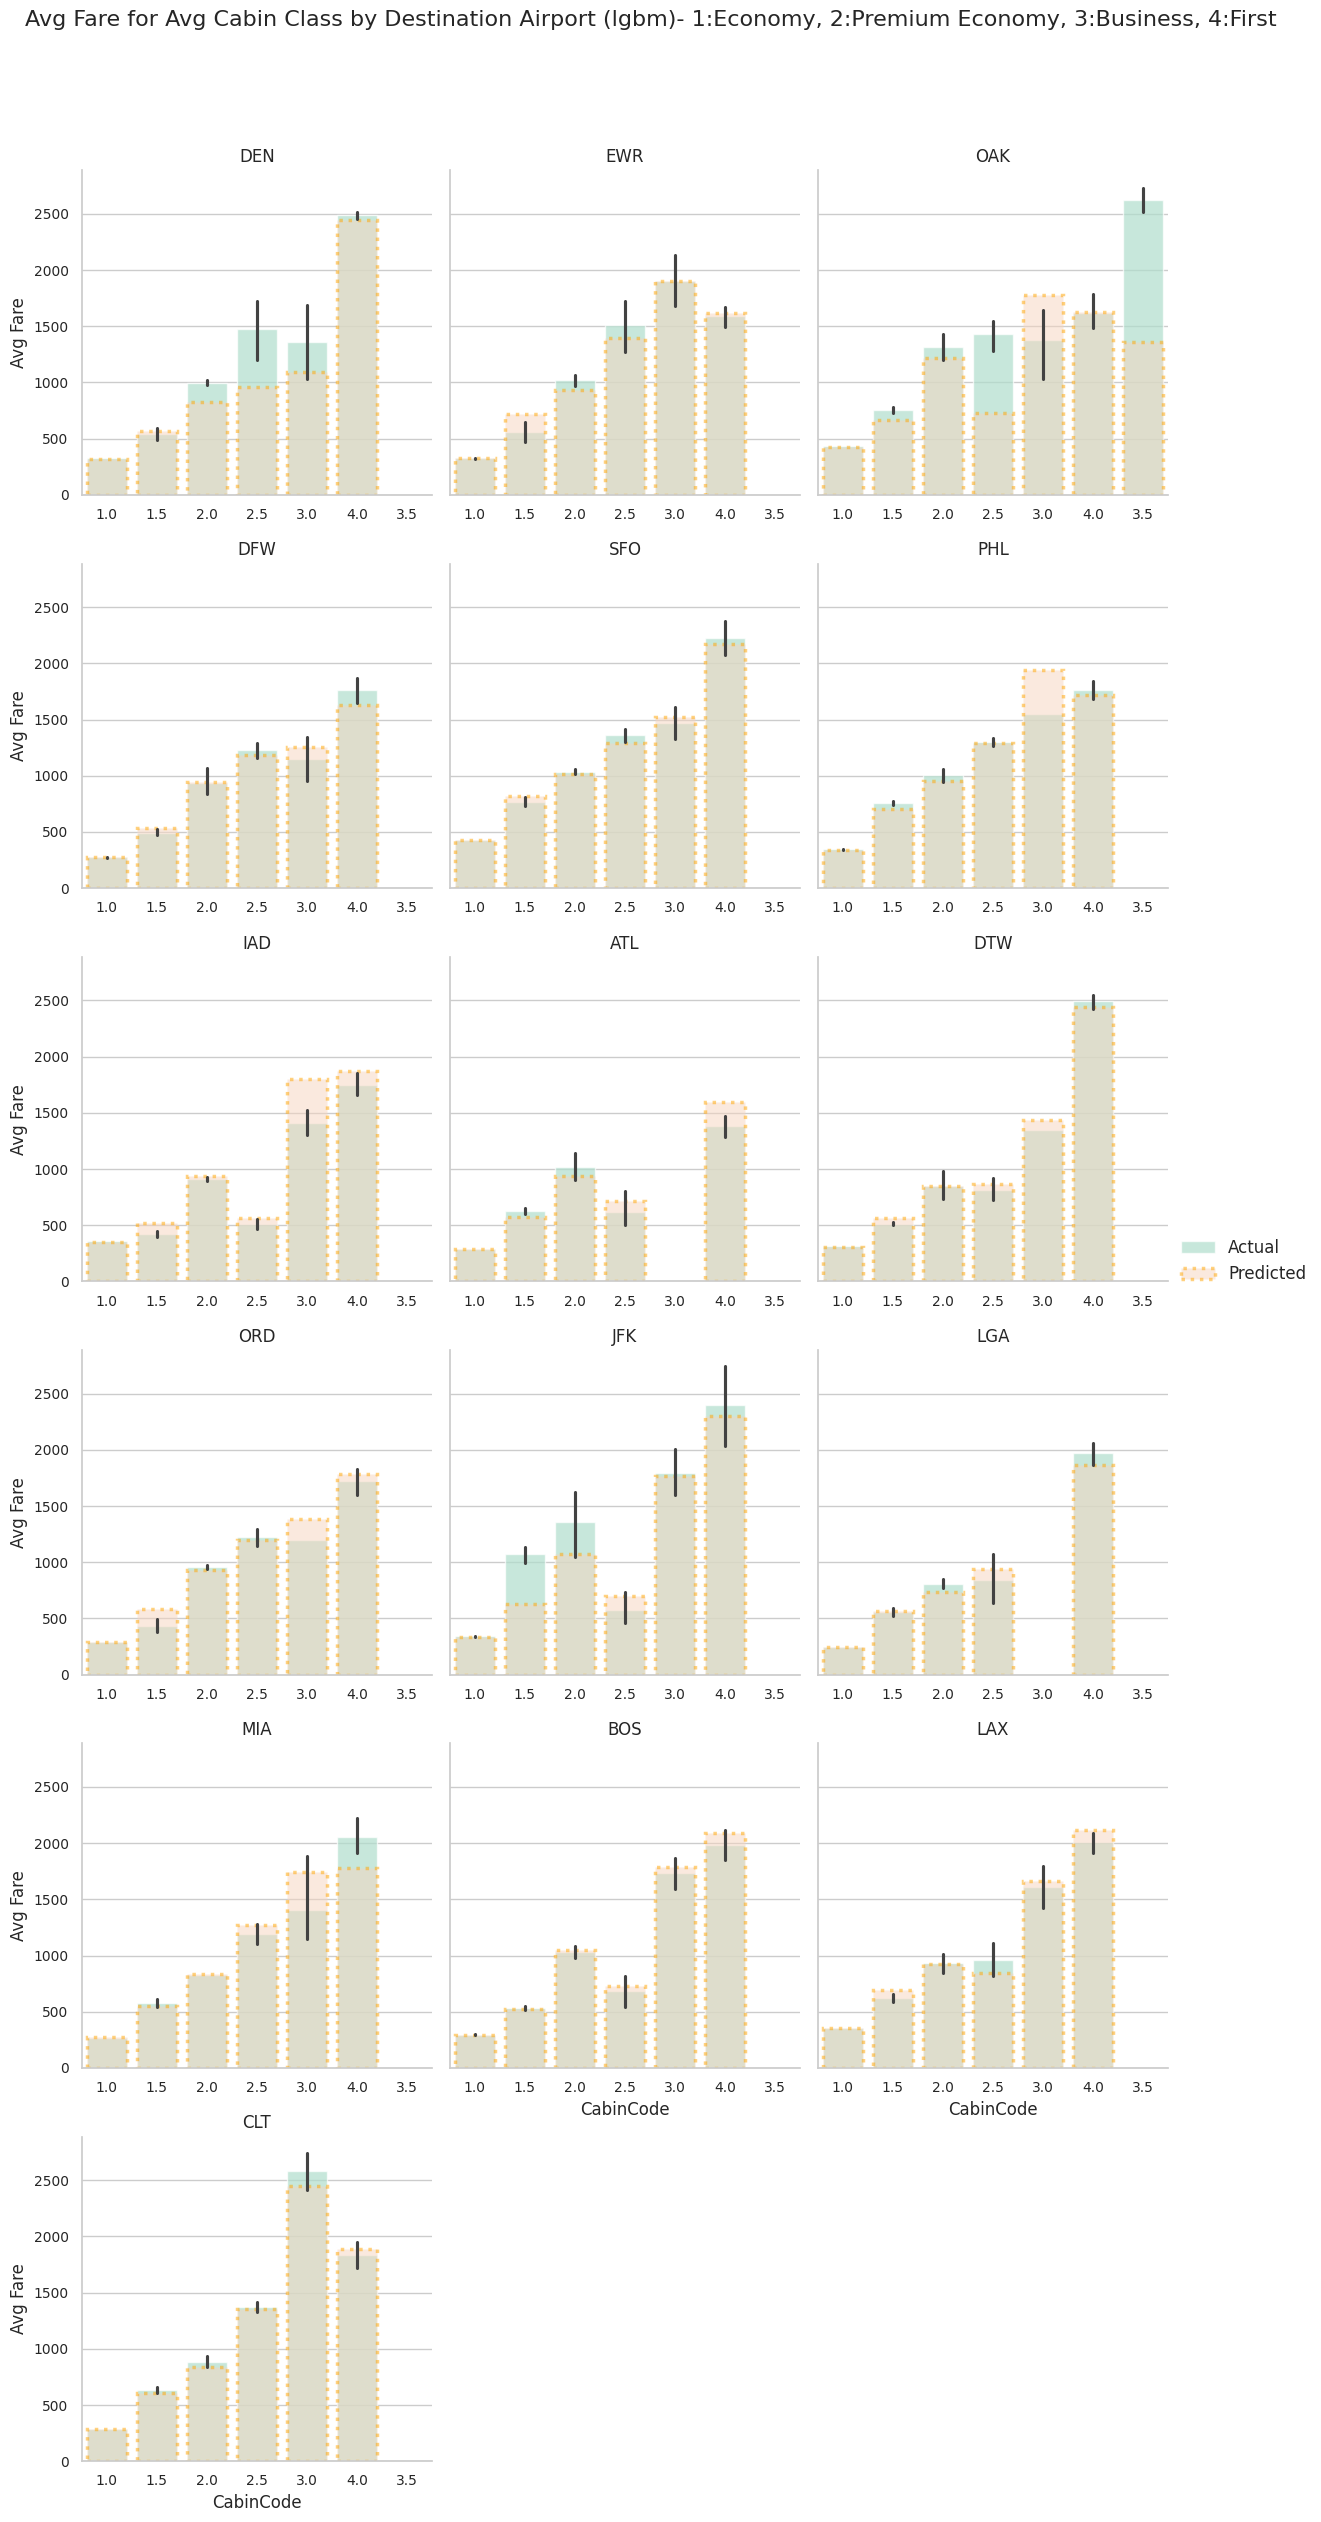

In [221]:
# Plot cabin class by destination airport
df = data
label=['Economy', 'Premium Economy', 'Business', 'First']
route_facet_plot(df, 'destinationAirport', 'CabinCode','nn_predicted_totalFare', 'Avg Fare for Avg Cabin Class by Destination Airport (nn)- 1:Economy, 2:Premium Economy, 3:Business, 4:First')
plt.savefig('../reports/figures/avg_fare_cabin_class_by_destination_airport_nn.png')
route_facet_plot(df, 'destinationAirport', 'CabinCode','xgb_predicted_totalFare', 'Avg Fare for Avg Cabin Class by Destination Airport (xgb)- 1:Economy, 2:Premium Economy, 3:Business, 4:First')
plt.savefig('../reports/figures/avg_fare_cabin_class_by_destination_airport_xgb.png')
route_facet_plot(df, 'destinationAirport', 'CabinCode','lgbm_predicted_totalFare', 'Avg Fare for Avg Cabin Class by Destination Airport (lgbm)- 1:Economy, 2:Premium Economy, 3:Business, 4:First')
plt.savefig('../reports/figures/avg_fare_cabin_class_by_destination_airport_lgbm.png')

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22]
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22]
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22]


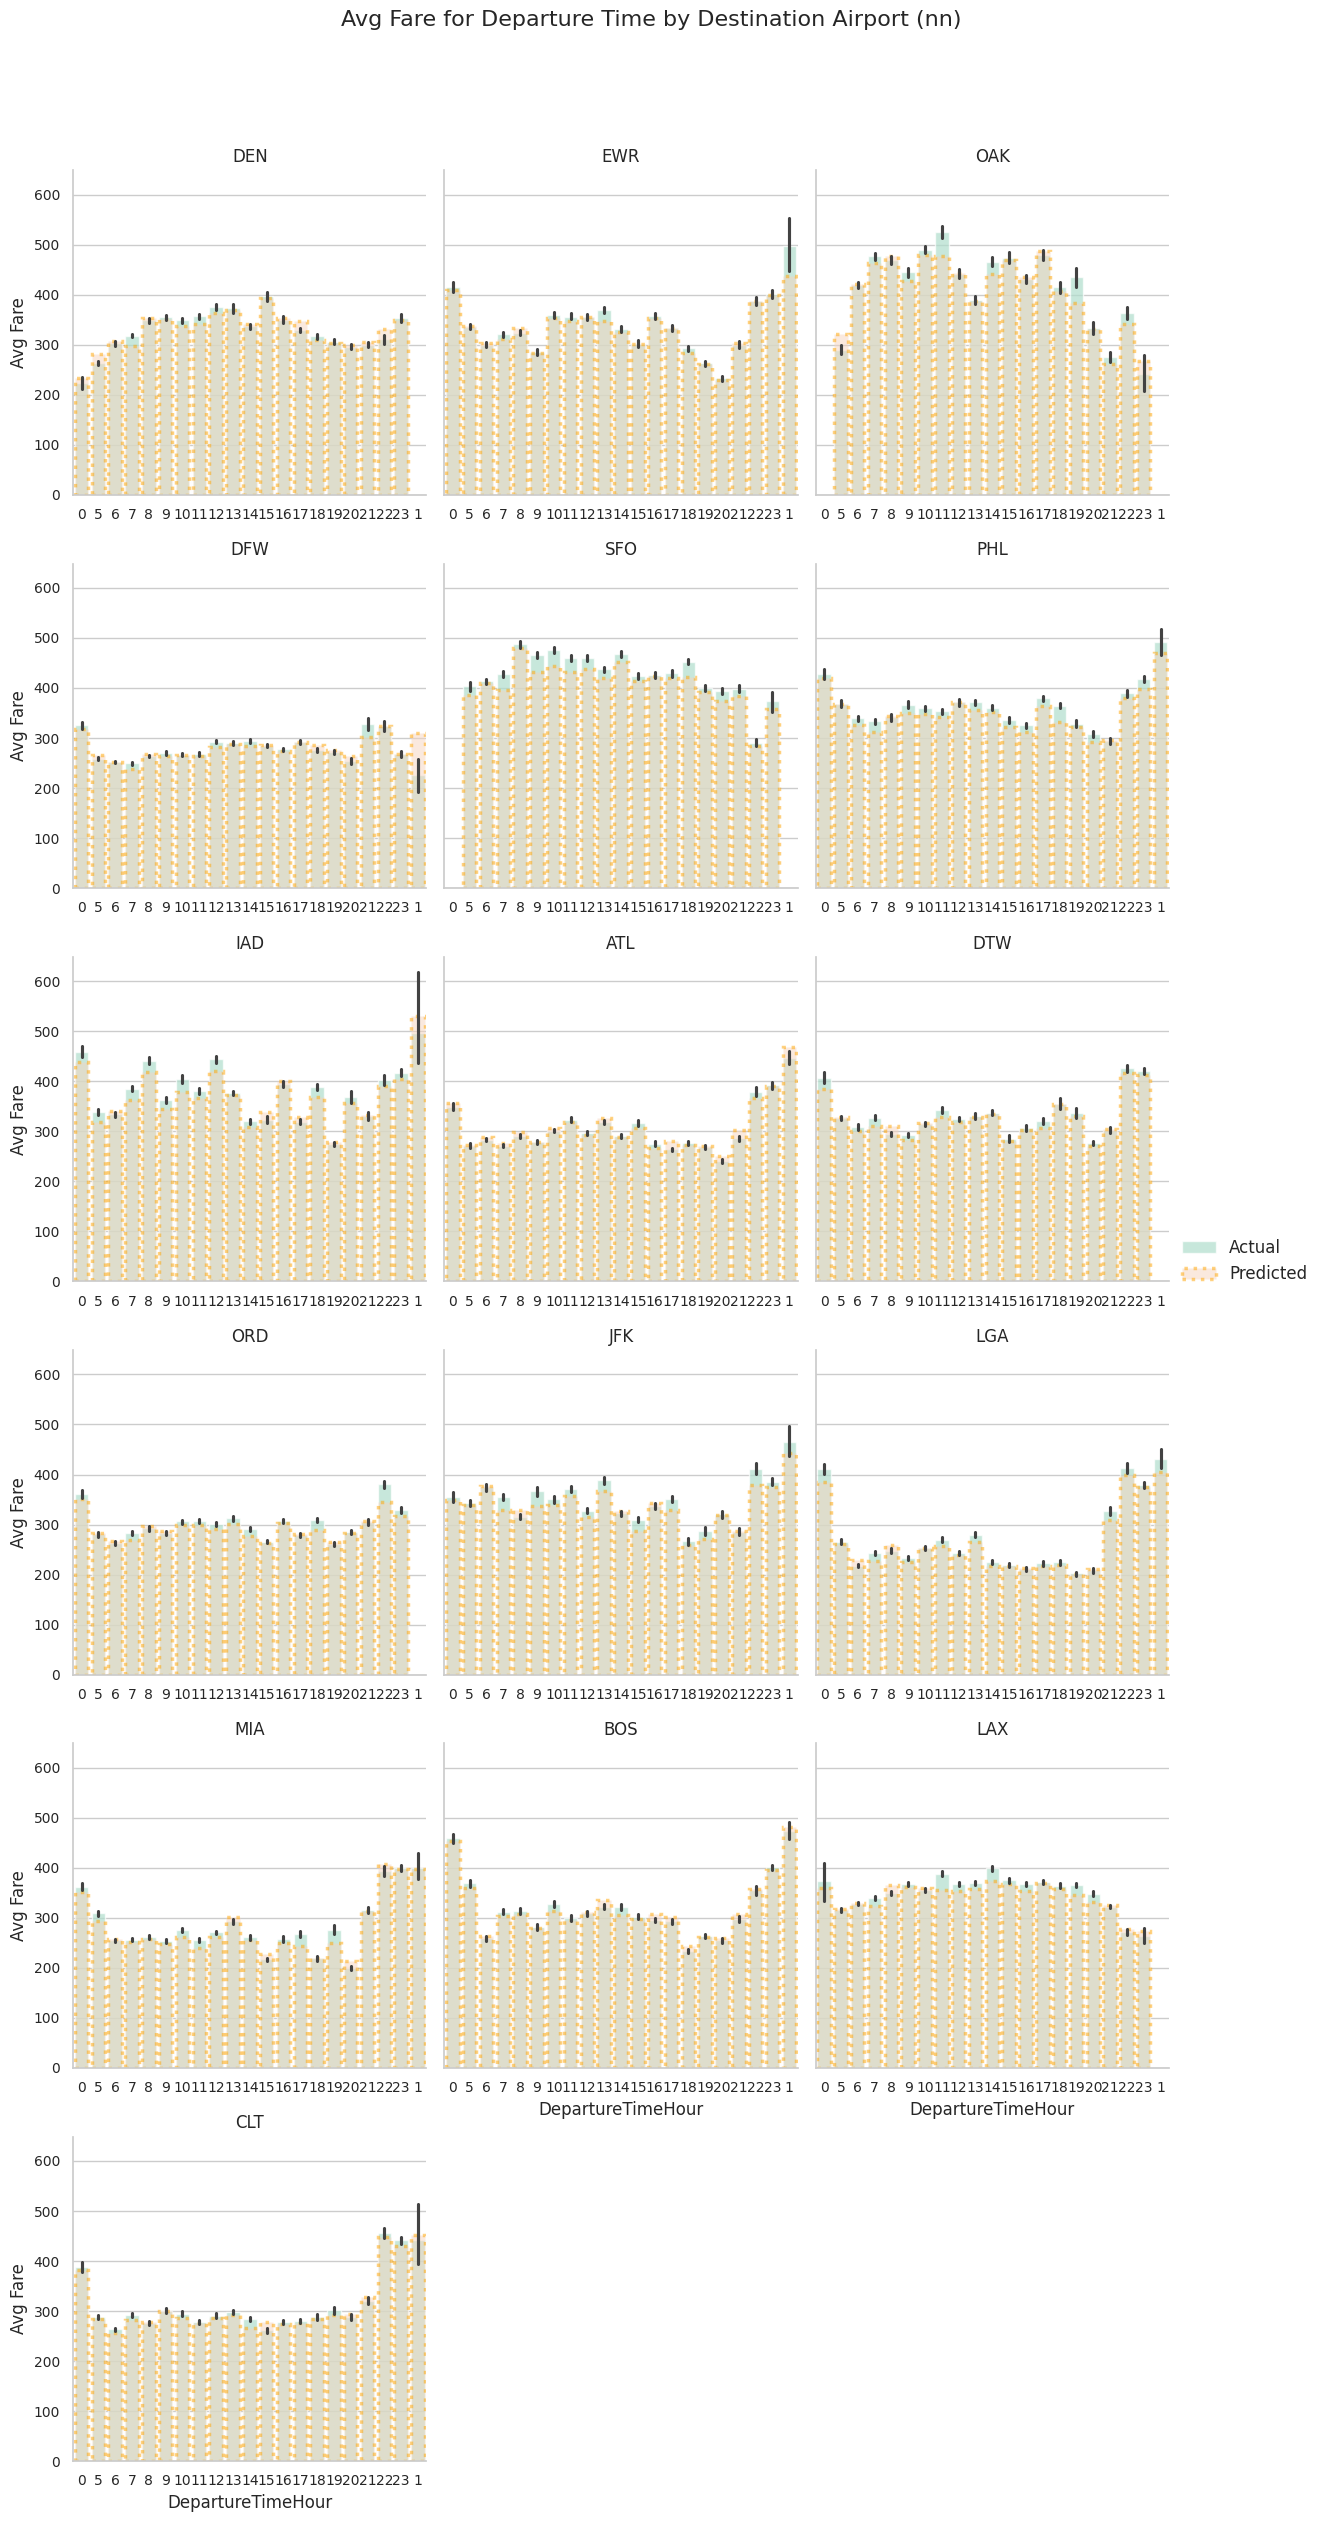

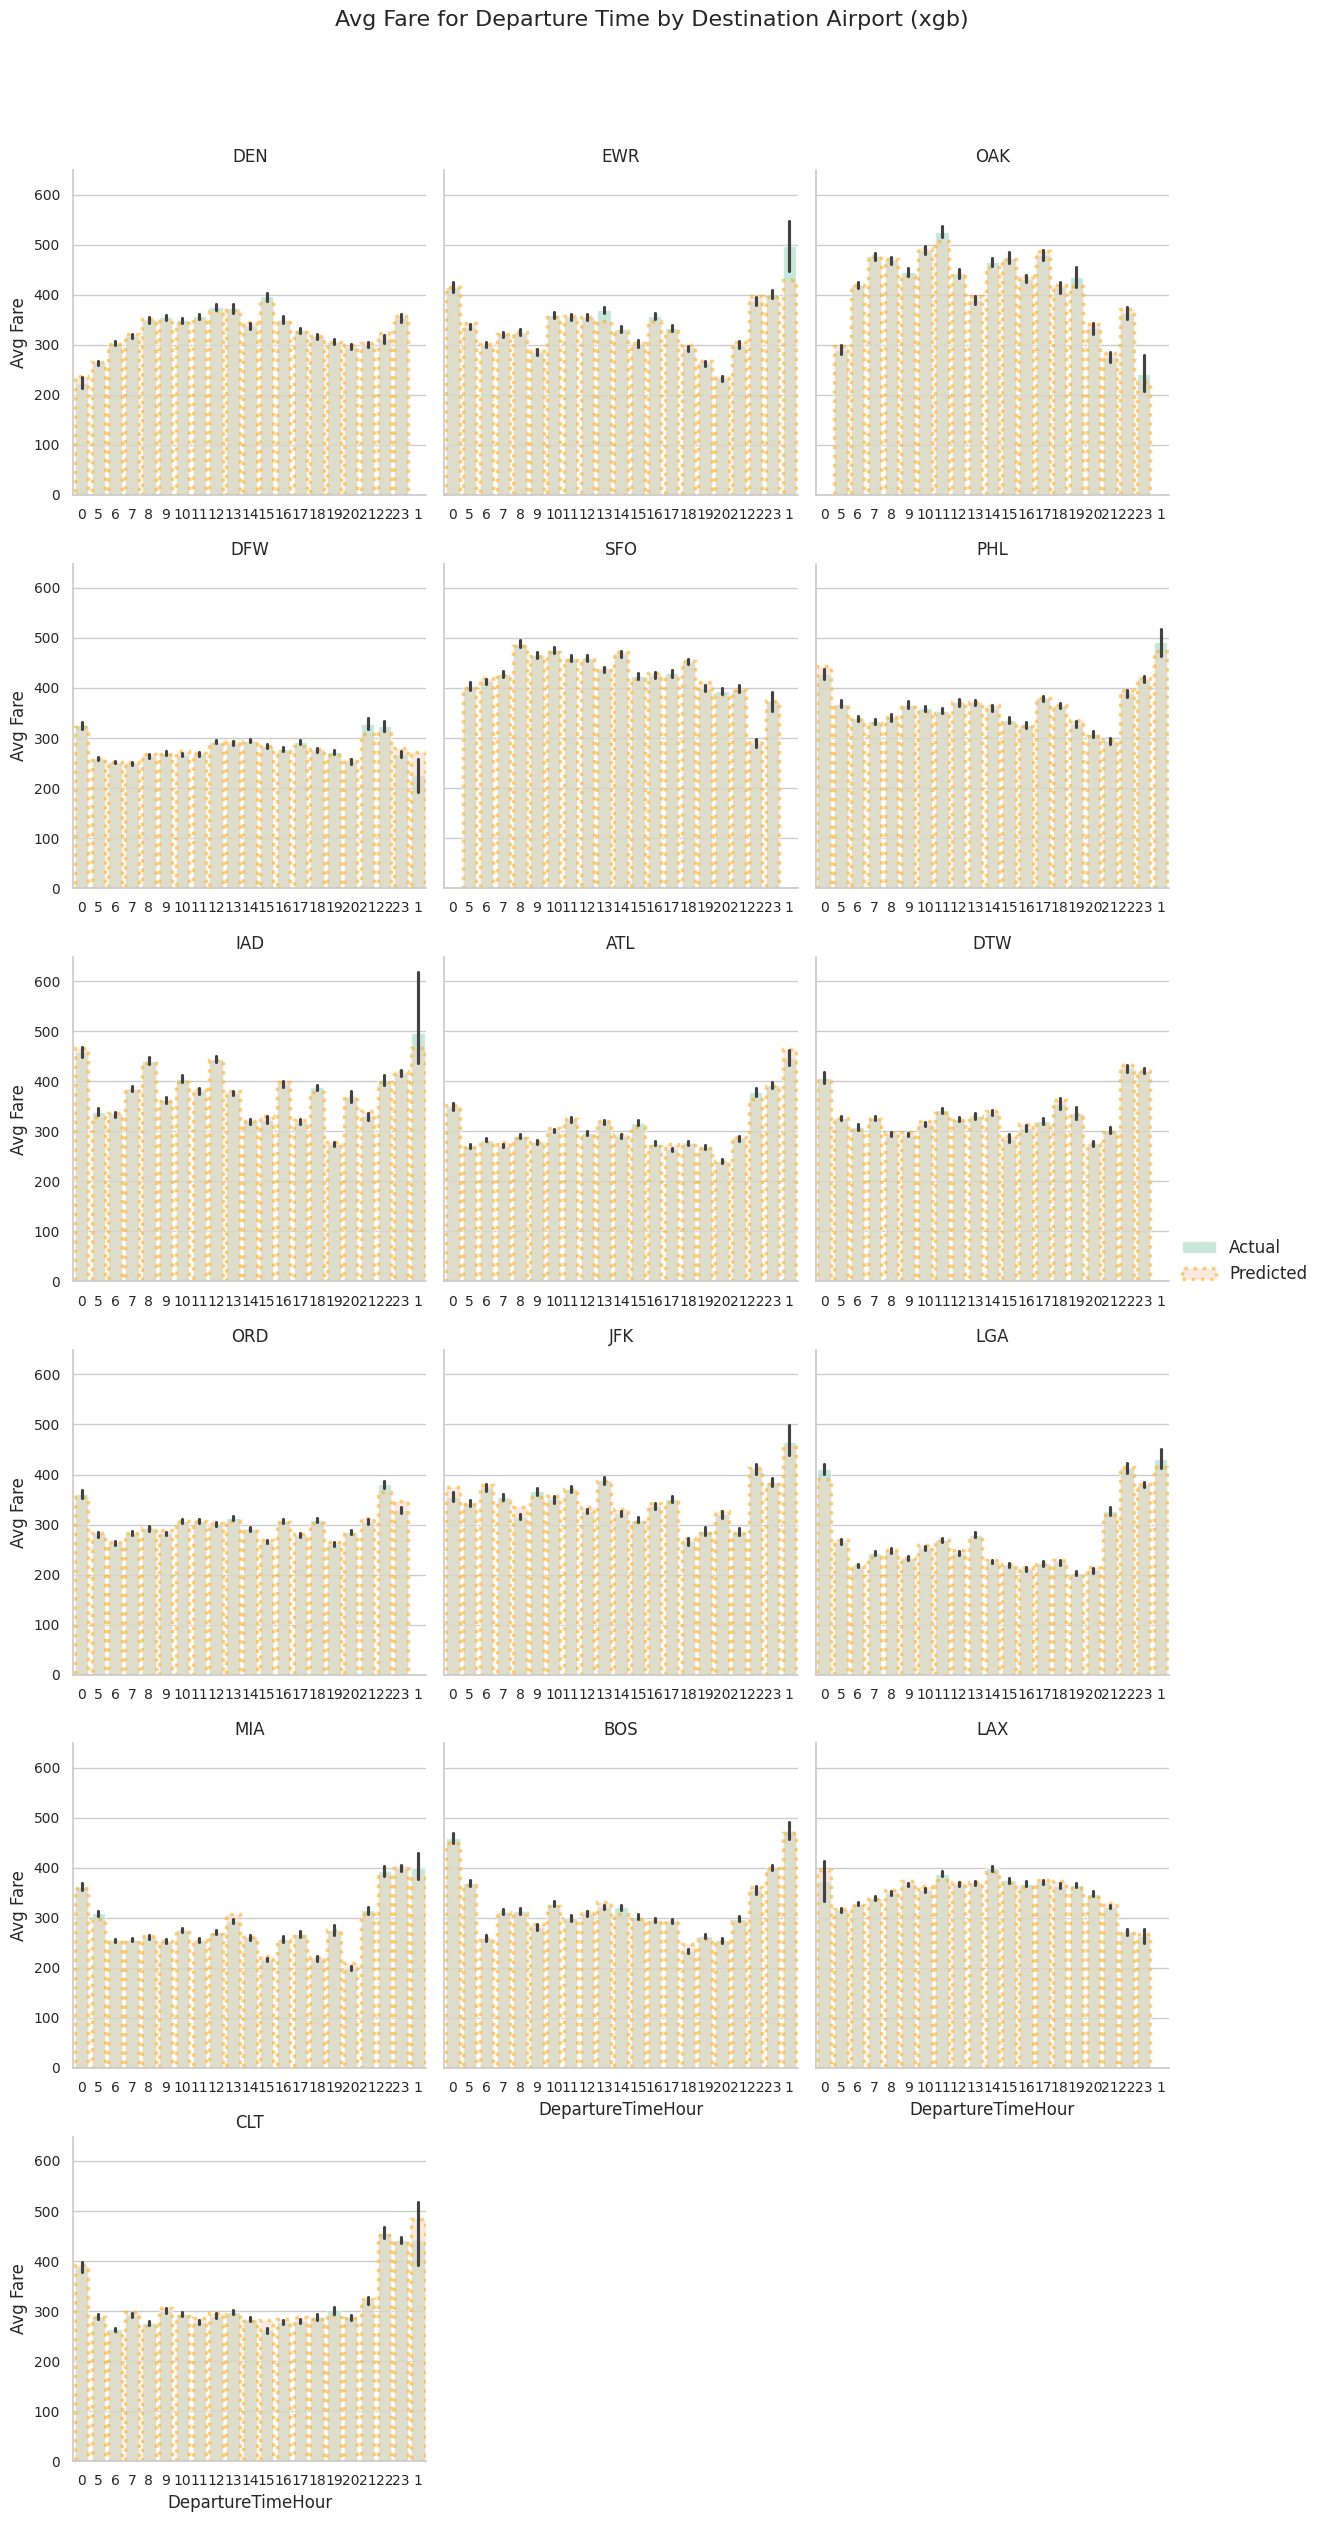

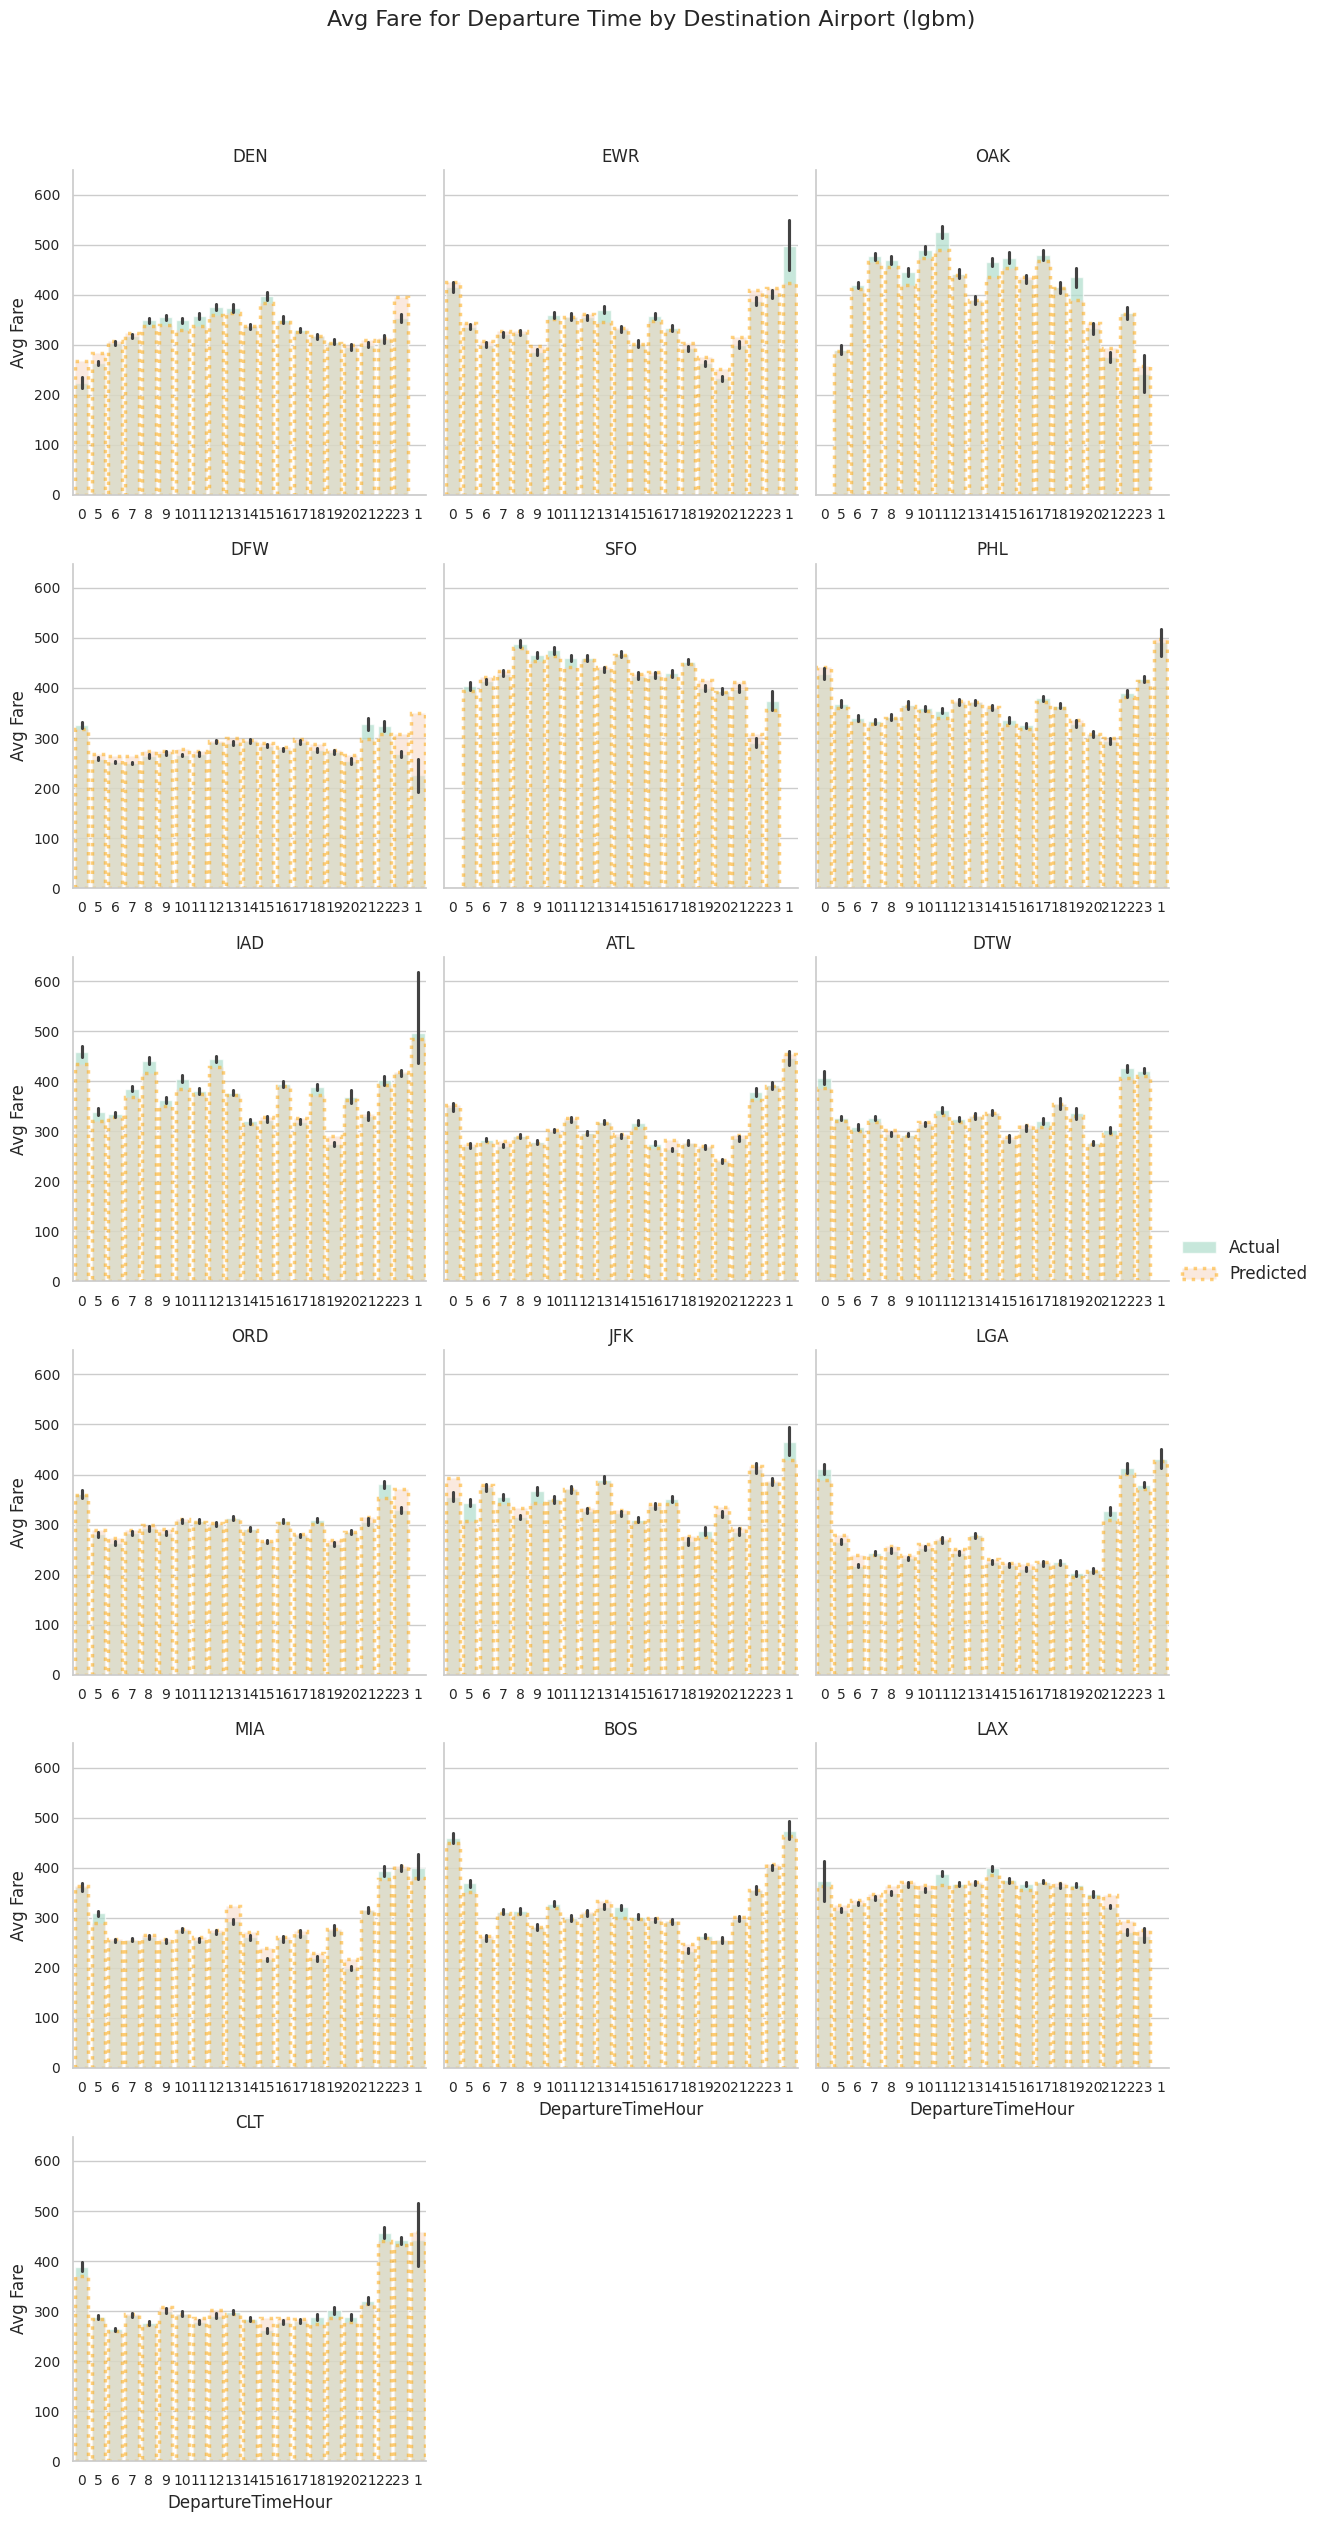

In [228]:
# PLote departure time by destination airport
df = data
route_facet_plot(df, 'destinationAirport', 'DepartureTimeHour','nn_predicted_totalFare', 'Avg Fare for Departure Time by Destination Airport (nn)')
plt.savefig('../reports/figures/avg_fare_departure_time_by_destination_airport_nn.png')
route_facet_plot(df, 'destinationAirport', 'DepartureTimeHour','xgb_predicted_totalFare', 'Avg Fare for Departure Time by Destination Airport (xgb)')
plt.savefig('../reports/figures/avg_fare_departure_time_by_destination_airport_xgb.png')
route_facet_plot(df, 'destinationAirport', 'DepartureTimeHour','lgbm_predicted_totalFare', 'Avg Fare for Departure Time by Destination Airport (lgbm)')
plt.savefig('../reports/figures/avg_fare_departure_time_by_destination_airport_lgbm.png')